 #  <p style="text-align: center;">NEURAL NETWORKS: BANK CHURN PREDICTION

**Objective:** Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.

**Context:** Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

###  Load the Libraries:

In [1]:
# Numerical and data libraries
import pandas as pd
import numpy as np
import seaborn as sns

# importing ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import metrics  #performance of the model

##Scale the data
from scipy.stats import zscore

# hyperparameter tuning using GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Using Tensorflow Keras instead of the original Keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense #importing fully connected Neural Network Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

###  Import data files as data frames: 

In [2]:
Bank_Data = pd.read_csv("Bank.csv")

In [3]:
Bank_Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Quality Checks:

**Check for null values**

In [4]:
Bank_Data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values or NaN values in the dataset.

**Check the Dimension of data**

In [5]:
Bank_Data.shape

(10000, 14)

In [6]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are 10 000 Observations of data input / rows and 14 data fields attributes / columns. By using the columns 1 to 13, we want to predict if the customer will exit or not that is column 14.

In [7]:
Bank_Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


## EXPLORATORY DATA ANALYTICS (EDA)

### Univariate Analysis:
Display univariate plots of the attributes: 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts'and 'EstimatedSalary' from the respective Bank Customer Data set.

In [8]:
EDA_Columns = list(Bank_Data)[3:4] + list(Bank_Data)[6:10] + list(Bank_Data)[12:13]
print(EDA_Columns)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


**Histogram plots for important independent numeric variables**

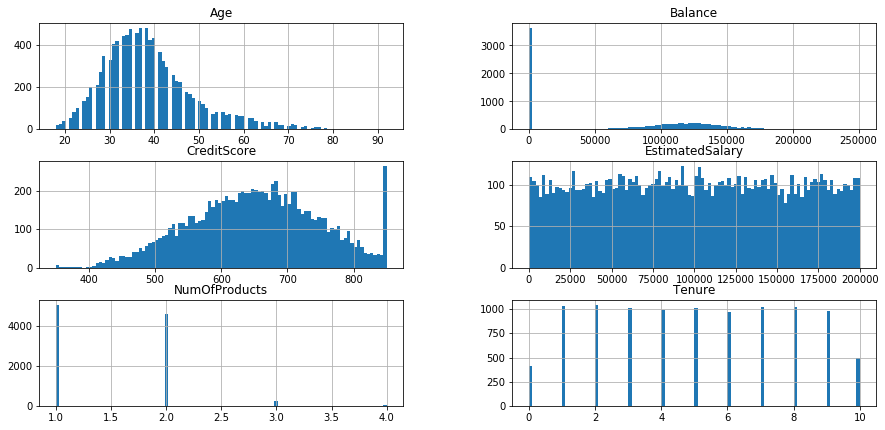

In [9]:
Bank_Data[EDA_Columns].hist(stacked=False, bins=100, figsize=(15,35), layout=(14,2)); 
# Histogram of the numeric data columns

**Detecting Outliers using Boxplot:**

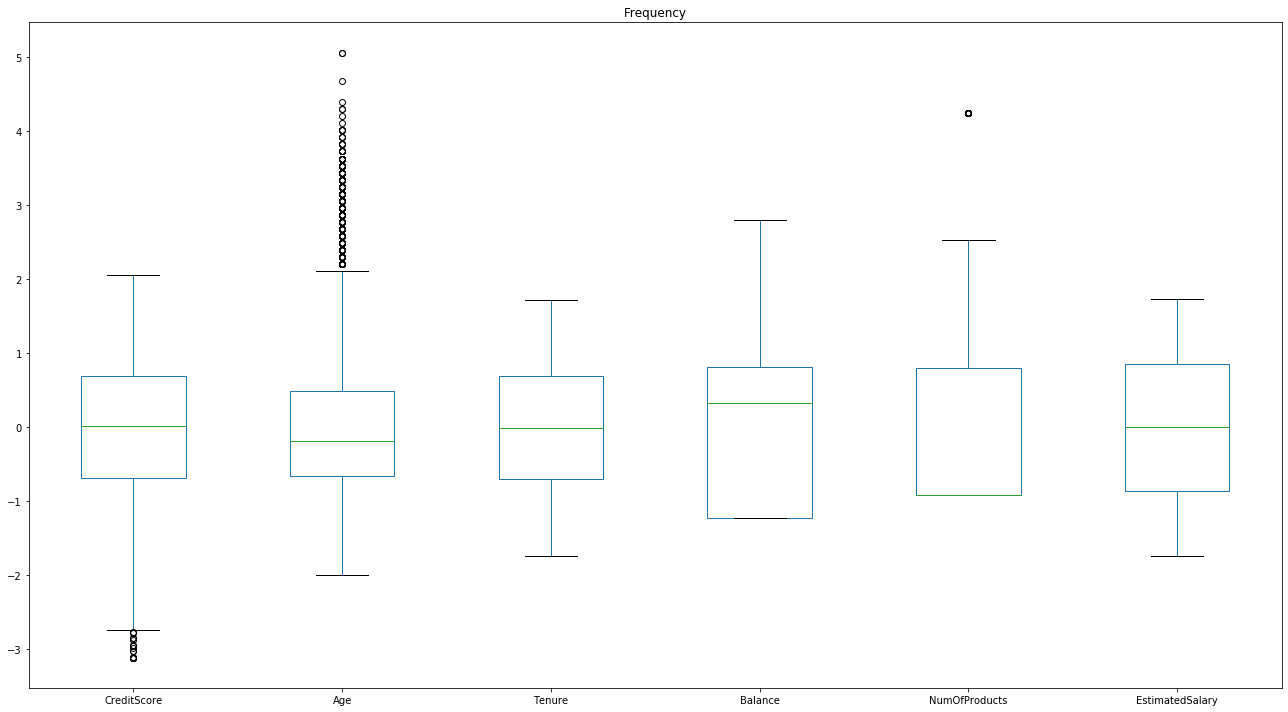

In [10]:
#let´s see how are distributed the frequency variables

DF = Bank_Data[EDA_Columns].apply(zscore)

DF[EDA_Columns].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

There are a few outliers, but we will keep then for now:

### Bivariate Analysis:

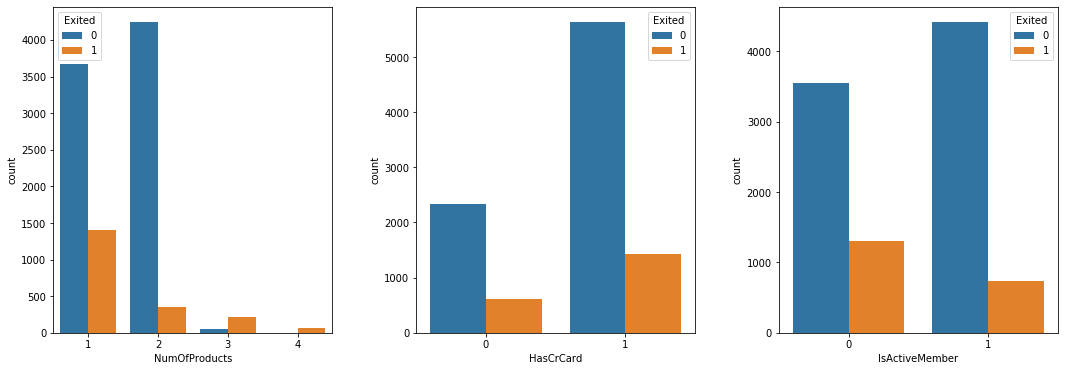

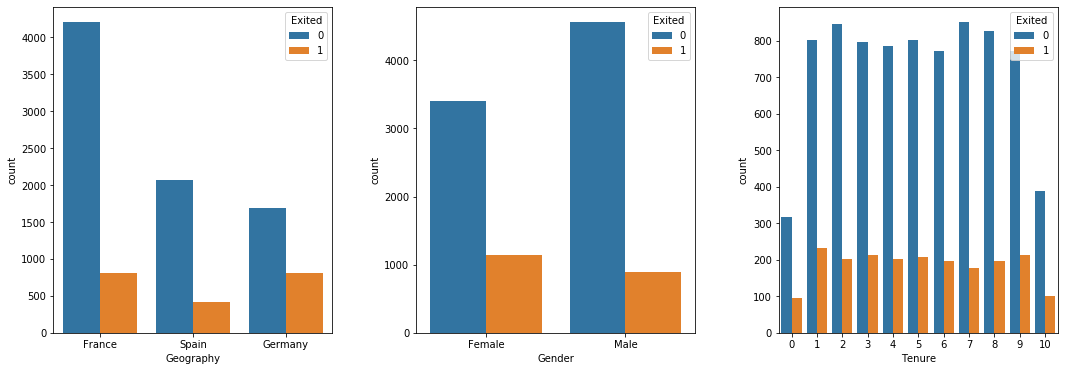

In [11]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = Bank_Data, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = Bank_Data, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = Bank_Data, ax = ax[2])

_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "Geography", hue="Exited", data = Bank_Data, ax= ax[0])
sns.countplot(x = "Gender", hue="Exited", data = Bank_Data, ax= ax[1])
sns.countplot(x = "Tenure", hue="Exited", data = Bank_Data, ax= ax[2])

There appears to be a 'higher' Customer Churn amongst the female customer segment as opposed to the male customer segment. 

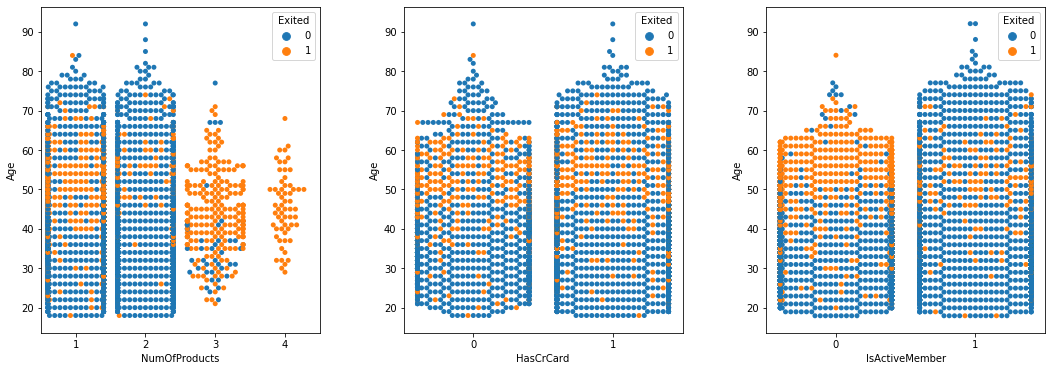

In [12]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = Bank_Data, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = Bank_Data, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = Bank_Data, ax = ax[2])

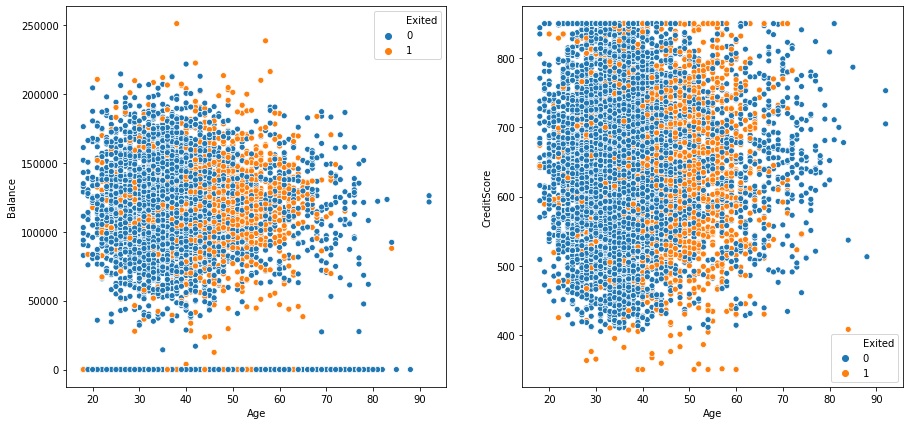

In [13]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = Bank_Data, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = Bank_Data, ax=ax[1])

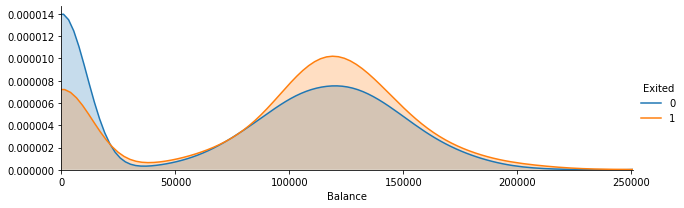

In [14]:
facet = sns.FacetGrid(Bank_Data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, Bank_Data["Balance"].max()))
facet.add_legend()

plt.show()

There appears to be a 'higher' Customer Churn amongst the customer segment with lower balances:

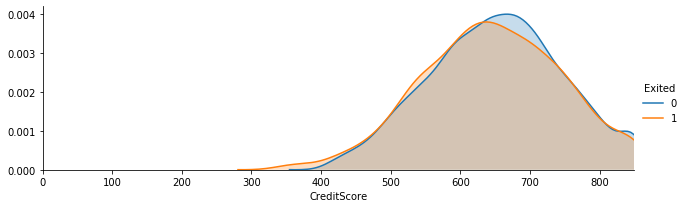

In [15]:
facet = sns.FacetGrid(Bank_Data, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, Bank_Data["CreditScore"].max()))
facet.add_legend()

plt.show()

#### Checking Correlation:

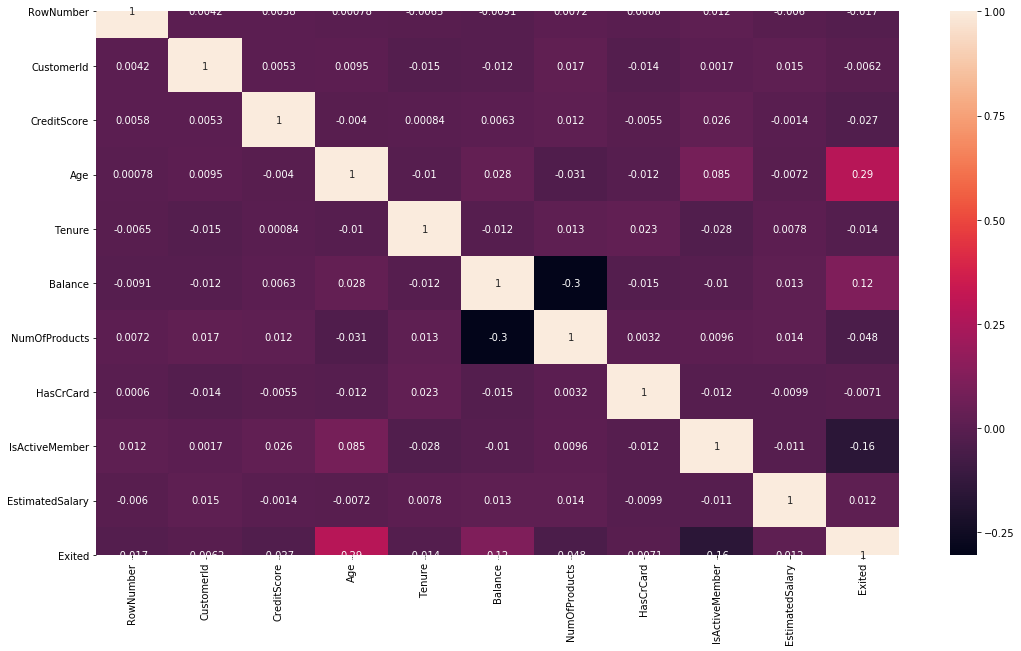

In [16]:
#Lets take a look at how the  variables are correlated
plt.figure(figsize=(18,10))
sns.heatmap(Bank_Data.corr(),annot=True);

#### Observations from bivariate analysis of the Bank Data set:

Some key observations from the bivariate analysis of the Bank Data Set include: 
- There appears to be a 'higher' Customer Churn amongst the customer segment with lower balances:
- There appears to be a 'higher' Customer Churn amongst the customer segment with a higher number of credit cards. 
- There appears to be a 'higher' Customer Churn amongst the female customer segment as opposed to the male customer segment. 

## FEATURE EGINEERING

**Perform any feature engineering/transformation and remove any duplicate or irrelevant columns:**

In [17]:
# Let us now remove duplicate/irrelevant columns
Bank_Data_Updated = Bank_Data.drop(['RowNumber','CustomerId','Surname'], axis =1)
Bank_Data_Updated.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


RowNumber, CustomerId and Surname are irrelivant, so we drop those features.

**Encoding the categorical data:**

In [18]:
encoder = LabelEncoder()
Bank_Data_Updated["Geography"] = encoder.fit_transform(Bank_Data_Updated["Geography"])
Bank_Data_Updated["Gender"] = encoder.fit_transform(Bank_Data_Updated["Gender"])
Bank_Data_Updated.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### SPLIT DATA

Let’s separate our predictors (X) from our target variable (y).

In [19]:
X = Bank_Data_Updated.drop(["Exited"], axis=1)
y = Bank_Data_Updated.pop("Exited")

The dependent variable (Exited), the value that we are going to predict, will be the exit of the customer from the bank (binary variable 0 if the customer stays and 1 if the client exit).

The **independent variables** will be:

* Credit Score: reliability of the customer
* Geography: where is the customer from
* Gender: Male or Female
* Age
* Tenure: number of years of customer history in the company
* Balance: the money in the bank account
* Number of products of the customer in the bank
* Credit Card: if the customer has or not the CC
* Active: if the customer is active or not
* Estimated Salary: estimation of salary based on the entries

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [21]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(Bank_Data_Updated.index)) * 100))
print("{0:0.2f}% data is in validation set".format((len(X_val)/len(Bank_Data_Updated.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(Bank_Data_Updated.index)) * 100))

60.00% data is in training set
20.00% data is in validation set
20.00% data is in test set


As we will be performing hyperparameter tuning for the ANN Model a validation data set is required. 

The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. the number of hidden units (layers and layer widths) in the neural network). 

### Feature Scaling

In [22]:
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

In ANN feature scaling is very important so that all inputs are at a comparable range and only the weights assigned to them are, in fact, the only factor which makes a difference on the predicted value.

In [23]:
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

## BUILDING THE DEEP NEURAL NETWORK MODEL

In [24]:
classifier = Sequential()

### Adding layers [layers and activations]

We start building the Neural Network and adding the layers within the Network:

**Adding the input layer:**

In [25]:
classifier.add(Dense(units=6, input_dim=10, activation='relu',kernel_initializer="uniform"))

**Adding the first hidden layer:**

In [26]:
classifier.add(Dense(units=6, activation='relu',kernel_initializer="uniform"))

**Adding the output layer:**

In [27]:
classifier.add(Dense(units=1, input_dim=11, activation='sigmoid',kernel_initializer="uniform"))

It should be noted that as this is a binary (two possible output) classification problem, a sigmoid layer (softmax for multi-class problems) is added.

### Model compile [optimizers and loss functions]

In [28]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Types of loss (function) and optimizer is be designated above. 

**Summary of the model:**

In [29]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


### Training [Forward pass and Backpropagation]

Fitting the ANN to the Training Set

In [30]:
NN_classifier = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 10, epochs = 100)

Train on 6000 samples, validate on 2000 samples
Epoch 1/40
6000/6000 [==============================] - 2s 403us/sample - loss: 0.4981 - accuracy: 0.7988 - val_loss: 0.4463 - val_accuracy: 0.7925
Epoch 2/40
6000/6000 [==============================] - 1s 227us/sample - loss: 0.4311 - accuracy: 0.7988 - val_loss: 0.4430 - val_accuracy: 0.7925
Epoch 3/40
6000/6000 [==============================] - 1s 228us/sample - loss: 0.4265 - accuracy: 0.7988 - val_loss: 0.4378 - val_accuracy: 0.7925
Epoch 4/40
6000/6000 [==============================] - 1s 228us/sample - loss: 0.4222 - accuracy: 0.8008 - val_loss: 0.4351 - val_accuracy: 0.8110
Epoch 5/40
6000/6000 [==============================] - 2s 301us/sample - loss: 0.4193 - accuracy: 0.8233 - val_loss: 0.4327 - val_accuracy: 0.8205
Epoch 6/40
6000/6000 [==============================] - 1s 243us/sample - loss: 0.4175 - accuracy: 0.8280 - val_loss: 0.4314 - val_accuracy: 0.8235
Epoch 7/40
6000/6000 [==============================] - 1s 243us

### Evaluation

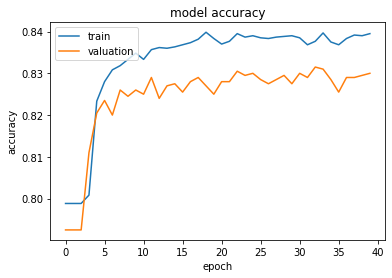

In [31]:
plt.plot(NN_classifier.history['accuracy'])
plt.plot(NN_classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valuation'], loc='upper left')
plt.show()

In [32]:
y_pred = classifier.predict(X_val)
y_pred = (y_pred > 0.5)

If y_pred is larger than 0.5 it returns true(1) else false(2)

In [33]:
accuracy_val = accuracy_score(y_val, y_pred)
print(accuracy_val)

0.83


In [34]:
accuracy_test = accuracy_score(y_test, y_pred)
print(accuracy_test)

0.739


### CONFUSION MATRIX FOR THE MODEL:

Text(0.5, 15.0, 'Predicted Customer Churn')

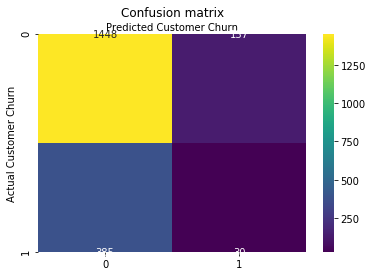

In [35]:
y_preds = []
for val in y_pred:
    y_preds.append(np.argmax(val))
#print(y_pred)    

#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots()
tick_marks = np.arange(len("Predict")) 
plt.xticks(tick_marks, "Predict 1")
plt.yticks(tick_marks, "Predict 0")
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Customer Churn')
plt.xlabel('Predicted Customer Churn')

In [36]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1585
           1       0.18      0.07      0.10       415

    accuracy                           0.74      2000
   macro avg       0.48      0.49      0.48      2000
weighted avg       0.66      0.74      0.69      2000



## IMPROVING THE ARTIFICIAL NEURAL NETWORK MODEL

To try to increase the ANN Model accuracy we shall try to change the architecture of the ANN or do more parameter tunning.

**Improving the Artificial Neural Network:**
* Use **GridSearchCV** - to find best parameters automatically. Enter all the hyperparameters we want to test your network on and after testing everything it will give the best possible accuracy and parameters. 
* Use **Dropout technique** - Let's try add in a Dropout Layer. The dropout layer ensures that we remove a set percentage (in this case 0.2 or 20%) of the data each time we iterate through the neural network. This to prevent the model from overfitting on the training data. 

### Tuning the Artificial Neural Network [Hyperparameter Tuning:]

The hyperparameters are the number of epochs, the batch size, the optimiser of the number of neurons in the layers. Tuning means finding the best combination of these values. We will do this using grid search.



In [37]:
def build_classifier(optimizer):
     classifier2 = Sequential()
     classifier2.add(Dense(units = 6, kernel_initializer = "uniform", activation = 'relu', input_dim = 10))
     classifier2.add(Dense(units = 6, kernel_initializer = "uniform", activation = 'relu'))
     classifier2.add(Dense(units = 1, kernel_initializer = "uniform", activation = 'sigmoid'))
     classifier2.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
     return classifier2

classifier2 = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [20, 25],'epochs': [80, 100], 'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier2,param_grid = parameters, scoring = 'accuracy',cv = 10)

grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Train on 5400 samples
Epoch 1/80
5400/5400 [==============================] - 1s 194us/sample - loss: 0.5741 - accuracy: 0.7967
Epoch 2/80
5400/5400 [==============================] - 1s 108us/sample - loss: 0.4358 - accuracy: 0.7980
Epoch 3/80
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4298 - accuracy: 0.7980
Epoch 4/80
5400/5400 [==============================] - 1s 113us/sample - loss: 0.4258 - accuracy: 0.7980
Epoch 5/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4221 - accuracy: 0.7981
Epoch 6/80
5400/5400 [==============================] - 1s 107us/sample - loss: 0.4179 - accuracy: 0.8259
Epoch 7/80
5400/5400 [==============================] - 1s 113us/sample - loss: 0.4144 - accuracy: 0.8328
Epoch 8/80
5400/5400 [==============================] - 1s 190us/sample - loss: 0.4106 - accuracy: 0.8354
Epoch 9/80
5400/5400 [==============================] - 1s 194us/sample - loss: 0.4075 - accuracy: 0.8396
Epoch 10/80
5400/5400 [==

Epoch 77/80
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3859 - accuracy: 0.8419
Epoch 78/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3855 - accuracy: 0.8411
Epoch 79/80
5400/5400 [==============================] - 1s 115us/sample - loss: 0.3854 - accuracy: 0.8407
Epoch 80/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3854 - accuracy: 0.8424
Train on 5400 samples
Epoch 1/80
5400/5400 [==============================] - 1s 194us/sample - loss: 0.5879 - accuracy: 0.7957
Epoch 2/80
5400/5400 [==============================] - 1s 94us/sample - loss: 0.4391 - accuracy: 0.7967
Epoch 3/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4335 - accuracy: 0.7967
Epoch 4/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4310 - accuracy: 0.7967
Epoch 5/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4288 - accuracy: 0.7967
Epoch 6/80
5400/5400 [===

Epoch 73/80
5400/5400 [==============================] - 1s 131us/sample - loss: 0.4019 - accuracy: 0.8354
Epoch 74/80
5400/5400 [==============================] - 1s 172us/sample - loss: 0.4024 - accuracy: 0.8359
Epoch 75/80
5400/5400 [==============================] - 1s 154us/sample - loss: 0.4021 - accuracy: 0.8348
Epoch 76/80
5400/5400 [==============================] - 1s 142us/sample - loss: 0.4018 - accuracy: 0.8348
Epoch 77/80
5400/5400 [==============================] - 1s 135us/sample - loss: 0.4021 - accuracy: 0.8346
Epoch 78/80
5400/5400 [==============================] - 1s 132us/sample - loss: 0.4021 - accuracy: 0.8357
Epoch 79/80
5400/5400 [==============================] - 1s 141us/sample - loss: 0.4016 - accuracy: 0.8337
Epoch 80/80
5400/5400 [==============================] - 1s 127us/sample - loss: 0.4019 - accuracy: 0.8341
Train on 5400 samples
Epoch 1/80
5400/5400 [==============================] - 1s 267us/sample - loss: 0.5723 - accuracy: 0.8004
Epoch 2/80
5400/

5400/5400 [==============================] - 1s 142us/sample - loss: 0.3965 - accuracy: 0.8394
Epoch 70/80
5400/5400 [==============================] - 1s 204us/sample - loss: 0.3962 - accuracy: 0.8387
Epoch 71/80
5400/5400 [==============================] - 1s 209us/sample - loss: 0.3959 - accuracy: 0.8391
Epoch 72/80
5400/5400 [==============================] - 1s 114us/sample - loss: 0.3958 - accuracy: 0.8398
Epoch 73/80
5400/5400 [==============================] - 1s 112us/sample - loss: 0.3960 - accuracy: 0.8396
Epoch 74/80
5400/5400 [==============================] - 1s 139us/sample - loss: 0.3955 - accuracy: 0.8413
Epoch 75/80
5400/5400 [==============================] - 1s 114us/sample - loss: 0.3959 - accuracy: 0.8381
Epoch 76/80
5400/5400 [==============================] - 1s 136us/sample - loss: 0.3959 - accuracy: 0.8389
Epoch 77/80
5400/5400 [==============================] - 1s 145us/sample - loss: 0.3957 - accuracy: 0.8404
Epoch 78/80
5400/5400 [==========================

5400/5400 [==============================] - 0s 92us/sample - loss: 0.3878 - accuracy: 0.8385
Epoch 66/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3878 - accuracy: 0.8370
Epoch 67/80
5400/5400 [==============================] - 0s 92us/sample - loss: 0.3872 - accuracy: 0.8385
Epoch 68/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3879 - accuracy: 0.8393
Epoch 69/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3875 - accuracy: 0.8394
Epoch 70/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3875 - accuracy: 0.8391
Epoch 71/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3873 - accuracy: 0.8398
Epoch 72/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3873 - accuracy: 0.8391
Epoch 73/80
5400/5400 [==============================] - 0s 92us/sample - loss: 0.3875 - accuracy: 0.8409
Epoch 74/80
5400/5400 [==============================] - 1

5400/5400 [==============================] - 1s 101us/sample - loss: 0.3436 - accuracy: 0.8628
Epoch 62/80
5400/5400 [==============================] - 1s 104us/sample - loss: 0.3432 - accuracy: 0.8613
Epoch 63/80
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3427 - accuracy: 0.8622
Epoch 64/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3424 - accuracy: 0.8626
Epoch 65/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3421 - accuracy: 0.8635
Epoch 66/80
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3415 - accuracy: 0.8626
Epoch 67/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3419 - accuracy: 0.8606
Epoch 68/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3411 - accuracy: 0.8633
Epoch 69/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3408 - accuracy: 0.8635
Epoch 70/80
5400/5400 [==============================] -

5400/5400 [==============================] - 1s 114us/sample - loss: 0.3900 - accuracy: 0.8439
Epoch 58/80
5400/5400 [==============================] - 1s 106us/sample - loss: 0.3901 - accuracy: 0.8431
Epoch 59/80
5400/5400 [==============================] - 1s 107us/sample - loss: 0.3900 - accuracy: 0.8419
Epoch 60/80
5400/5400 [==============================] - 1s 93us/sample - loss: 0.3895 - accuracy: 0.8428
Epoch 61/80
5400/5400 [==============================] - 1s 131us/sample - loss: 0.3893 - accuracy: 0.8420
Epoch 62/80
5400/5400 [==============================] - 1s 126us/sample - loss: 0.3892 - accuracy: 0.8452
Epoch 63/80
5400/5400 [==============================] - 1s 135us/sample - loss: 0.3894 - accuracy: 0.8417
Epoch 64/80
5400/5400 [==============================] - 1s 148us/sample - loss: 0.3893 - accuracy: 0.8422
Epoch 65/80
5400/5400 [==============================] - 1s 138us/sample - loss: 0.3892 - accuracy: 0.8419
Epoch 66/80
5400/5400 [===========================

5400/5400 [==============================] - 0s 91us/sample - loss: 0.4013 - accuracy: 0.8363
Epoch 54/80
5400/5400 [==============================] - 0s 90us/sample - loss: 0.4018 - accuracy: 0.8370
Epoch 55/80
5400/5400 [==============================] - 0s 90us/sample - loss: 0.4013 - accuracy: 0.8352
Epoch 56/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4011 - accuracy: 0.8374
Epoch 57/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4011 - accuracy: 0.8367
Epoch 58/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4005 - accuracy: 0.8359
Epoch 59/80
5400/5400 [==============================] - 0s 89us/sample - loss: 0.4008 - accuracy: 0.8367
Epoch 60/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4004 - accuracy: 0.8367
Epoch 61/80
5400/5400 [==============================] - 0s 90us/sample - loss: 0.4007 - accuracy: 0.8383
Epoch 62/80
5400/5400 [==============================] - 1

5400/5400 [==============================] - 0s 90us/sample - loss: 0.3874 - accuracy: 0.8428
Epoch 50/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3873 - accuracy: 0.8417
Epoch 51/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3871 - accuracy: 0.8426
Epoch 52/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3871 - accuracy: 0.8400
Epoch 53/80
5400/5400 [==============================] - 1s 109us/sample - loss: 0.3871 - accuracy: 0.8435
Epoch 54/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3869 - accuracy: 0.8419
Epoch 55/80
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3871 - accuracy: 0.8406
Epoch 56/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.3870 - accuracy: 0.8413
Epoch 57/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3862 - accuracy: 0.8413
Epoch 58/80
5400/5400 [==============================] -

5400/5400 [==============================] - 1s 109us/sample - loss: 0.4003 - accuracy: 0.8381
Epoch 46/80
5400/5400 [==============================] - 1s 105us/sample - loss: 0.4002 - accuracy: 0.8354
Epoch 47/80
5400/5400 [==============================] - 1s 108us/sample - loss: 0.4000 - accuracy: 0.8357
Epoch 48/80
5400/5400 [==============================] - 1s 110us/sample - loss: 0.4001 - accuracy: 0.8331
Epoch 49/80
5400/5400 [==============================] - 1s 105us/sample - loss: 0.3997 - accuracy: 0.8367
Epoch 50/80
5400/5400 [==============================] - 1s 112us/sample - loss: 0.3997 - accuracy: 0.8369
Epoch 51/80
5400/5400 [==============================] - 1s 108us/sample - loss: 0.3996 - accuracy: 0.8370
Epoch 52/80
5400/5400 [==============================] - 1s 118us/sample - loss: 0.3999 - accuracy: 0.8354
Epoch 53/80
5400/5400 [==============================] - 1s 174us/sample - loss: 0.3992 - accuracy: 0.8367
Epoch 54/80
5400/5400 [==========================

5400/5400 [==============================] - 1s 95us/sample - loss: 0.3852 - accuracy: 0.8433
Epoch 42/80
5400/5400 [==============================] - 1s 105us/sample - loss: 0.3850 - accuracy: 0.8456
Epoch 43/80
5400/5400 [==============================] - 1s 107us/sample - loss: 0.3852 - accuracy: 0.8446
Epoch 44/80
5400/5400 [==============================] - 0s 91us/sample - loss: 0.3852 - accuracy: 0.8463
Epoch 45/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3848 - accuracy: 0.8444
Epoch 46/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3848 - accuracy: 0.8448
Epoch 47/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3844 - accuracy: 0.8463
Epoch 48/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3845 - accuracy: 0.8452
Epoch 49/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3846 - accuracy: 0.8469
Epoch 50/80
5400/5400 [==============================] 

5400/5400 [==============================] - 1s 108us/sample - loss: 0.4025 - accuracy: 0.8396
Epoch 37/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4020 - accuracy: 0.8400
Epoch 38/80
5400/5400 [==============================] - 1s 104us/sample - loss: 0.4015 - accuracy: 0.8387
Epoch 39/80
5400/5400 [==============================] - 1s 93us/sample - loss: 0.4019 - accuracy: 0.8385
Epoch 40/80
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4017 - accuracy: 0.8393
Epoch 41/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4013 - accuracy: 0.8404
Epoch 42/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4013 - accuracy: 0.8396
Epoch 43/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4008 - accuracy: 0.8391
Epoch 44/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4007 - accuracy: 0.8372
Epoch 45/80
5400/5400 [==============================

5400/5400 [==============================] - 1s 100us/sample - loss: 0.4073 - accuracy: 0.8339
Epoch 33/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4066 - accuracy: 0.8343
Epoch 34/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4063 - accuracy: 0.8344
Epoch 35/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4064 - accuracy: 0.8333
Epoch 36/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4061 - accuracy: 0.8339
Epoch 37/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4057 - accuracy: 0.8344
Epoch 38/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4058 - accuracy: 0.8322
Epoch 39/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4054 - accuracy: 0.8331
Epoch 40/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4051 - accuracy: 0.8350
Epoch 41/80
5400/5400 [=============================

5400/5400 [==============================] - 1s 101us/sample - loss: 0.4043 - accuracy: 0.8404
Epoch 29/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4048 - accuracy: 0.8400
Epoch 30/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4039 - accuracy: 0.8400
Epoch 31/80
5400/5400 [==============================] - 1s 93us/sample - loss: 0.4041 - accuracy: 0.8402
Epoch 32/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4034 - accuracy: 0.8400
Epoch 33/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4030 - accuracy: 0.8393
Epoch 34/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4026 - accuracy: 0.8391
Epoch 35/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4024 - accuracy: 0.8394
Epoch 36/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4020 - accuracy: 0.8404
Epoch 37/80
5400/5400 [==============================

5400/5400 [==============================] - 1s 148us/sample - loss: 0.4063 - accuracy: 0.8333
Epoch 25/80
5400/5400 [==============================] - 1s 134us/sample - loss: 0.4059 - accuracy: 0.8369
Epoch 26/80
5400/5400 [==============================] - ETA: 0s - loss: 0.4039 - accuracy: 0.83 - 1s 130us/sample - loss: 0.4056 - accuracy: 0.8369
Epoch 27/80
5400/5400 [==============================] - 1s 131us/sample - loss: 0.4047 - accuracy: 0.8378
Epoch 28/80
5400/5400 [==============================] - 1s 144us/sample - loss: 0.4042 - accuracy: 0.8352
Epoch 29/80
5400/5400 [==============================] - 1s 135us/sample - loss: 0.4040 - accuracy: 0.8369
Epoch 30/80
5400/5400 [==============================] - 1s 128us/sample - loss: 0.4033 - accuracy: 0.8387
Epoch 31/80
5400/5400 [==============================] - 1s 141us/sample - loss: 0.4030 - accuracy: 0.8372
Epoch 32/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4028 - accuracy: 0.8387
Epoch 3

5400/5400 [==============================] - 1s 106us/sample - loss: 0.4070 - accuracy: 0.8381
Epoch 21/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4062 - accuracy: 0.8361
Epoch 22/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4056 - accuracy: 0.8357
Epoch 23/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4051 - accuracy: 0.8374
Epoch 24/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4046 - accuracy: 0.8370
Epoch 25/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4041 - accuracy: 0.8378
Epoch 26/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4034 - accuracy: 0.8383
Epoch 27/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4032 - accuracy: 0.8374
Epoch 28/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4030 - accuracy: 0.8380
Epoch 29/80
5400/5400 [============================

5400/5400 [==============================] - 1s 103us/sample - loss: 0.4114 - accuracy: 0.8343
Epoch 17/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4112 - accuracy: 0.8356
Epoch 18/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4102 - accuracy: 0.8363
Epoch 19/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4096 - accuracy: 0.8389
Epoch 20/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4090 - accuracy: 0.8370
Epoch 21/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4084 - accuracy: 0.8387
Epoch 22/80
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4079 - accuracy: 0.8372
Epoch 23/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4070 - accuracy: 0.8374
Epoch 24/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4067 - accuracy: 0.8372
Epoch 25/80
5400/5400 [==============================]

5400/5400 [==============================] - 1s 121us/sample - loss: 0.4161 - accuracy: 0.8283
Epoch 13/80
5400/5400 [==============================] - 1s 114us/sample - loss: 0.4150 - accuracy: 0.8315
Epoch 14/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4144 - accuracy: 0.8333
Epoch 15/80
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4134 - accuracy: 0.8333
Epoch 16/80
5400/5400 [==============================] - 1s 140us/sample - loss: 0.4124 - accuracy: 0.8330
Epoch 17/80
5400/5400 [==============================] - 1s 148us/sample - loss: 0.4118 - accuracy: 0.8335
Epoch 18/80
5400/5400 [==============================] - 1s 174us/sample - loss: 0.4110 - accuracy: 0.8341
Epoch 19/80
5400/5400 [==============================] - 1s 136us/sample - loss: 0.4102 - accuracy: 0.8350
Epoch 20/80
5400/5400 [==============================] - 1s 118us/sample - loss: 0.4095 - accuracy: 0.8361
Epoch 21/80
5400/5400 [==========================

5400/5400 [==============================] - 1s 97us/sample - loss: 0.4177 - accuracy: 0.8244
Epoch 9/80
5400/5400 [==============================] - 1s 111us/sample - loss: 0.4162 - accuracy: 0.8243
Epoch 10/80
5400/5400 [==============================] - 1s 107us/sample - loss: 0.4151 - accuracy: 0.8291
Epoch 11/80
5400/5400 [==============================] - 1s 94us/sample - loss: 0.4137 - accuracy: 0.8304
Epoch 12/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4118 - accuracy: 0.8335
Epoch 13/80
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4119 - accuracy: 0.8330
Epoch 14/80
5400/5400 [==============================] - 1s 94us/sample - loss: 0.4109 - accuracy: 0.8372
Epoch 15/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4105 - accuracy: 0.8361
Epoch 16/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4094 - accuracy: 0.8372
Epoch 17/80
5400/5400 [==============================]

5400/5400 [==============================] - 1s 108us/sample - loss: 0.4289 - accuracy: 0.7967
Epoch 5/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4257 - accuracy: 0.8017
Epoch 6/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4225 - accuracy: 0.8213
Epoch 7/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4193 - accuracy: 0.8263
Epoch 8/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4165 - accuracy: 0.8291
Epoch 9/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4146 - accuracy: 0.8317
Epoch 10/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4127 - accuracy: 0.8317
Epoch 11/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4108 - accuracy: 0.8324
Epoch 12/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4095 - accuracy: 0.8339
Epoch 13/80
5400/5400 [==============================] - 1s 

5400/5400 [==============================] - 1s 106us/sample - loss: 0.3705 - accuracy: 0.8444
Train on 5400 samples
Epoch 1/80
5400/5400 [==============================] - 1s 199us/sample - loss: 0.5858 - accuracy: 0.8019
Epoch 2/80
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4413 - accuracy: 0.8028
Epoch 3/80
5400/5400 [==============================] - 1s 94us/sample - loss: 0.4270 - accuracy: 0.8028
Epoch 4/80
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4231 - accuracy: 0.8028
Epoch 5/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4209 - accuracy: 0.8028
Epoch 6/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4196 - accuracy: 0.8028
Epoch 7/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4181 - accuracy: 0.8028
Epoch 8/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4160 - accuracy: 0.8028
Epoch 9/80
5400/5400 [===================

5400/5400 [==============================] - 1s 100us/sample - loss: 0.3890 - accuracy: 0.8389
Epoch 77/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3883 - accuracy: 0.8419
Epoch 78/80
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3891 - accuracy: 0.8393
Epoch 79/80
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3886 - accuracy: 0.8380
Epoch 80/80
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3885 - accuracy: 0.8413
Train on 5400 samples
Epoch 1/100
5400/5400 [==============================] - 1s 207us/sample - loss: 0.5925 - accuracy: 0.7967
Epoch 2/100
5400/5400 [==============================] - 1s 93us/sample - loss: 0.4365 - accuracy: 0.7998
Epoch 3/100
5400/5400 [==============================] - 1s 107us/sample - loss: 0.4121 - accuracy: 0.8133
Epoch 4/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3964 - accuracy: 0.8183
Epoch 5/100
5400/5400 [==========

5400/5400 [==============================] - 1s 100us/sample - loss: 0.3263 - accuracy: 0.8667
Epoch 72/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3263 - accuracy: 0.8669
Epoch 73/100
5400/5400 [==============================] - 1s 104us/sample - loss: 0.3270 - accuracy: 0.8652
Epoch 74/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3273 - accuracy: 0.8648
Epoch 75/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3260 - accuracy: 0.8654
Epoch 76/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3264 - accuracy: 0.8665
Epoch 77/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3260 - accuracy: 0.8663
Epoch 78/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3261 - accuracy: 0.8641
Epoch 79/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3264 - accuracy: 0.8652
Epoch 80/100
5400/5400 [===================

Epoch 47/100
5400/5400 [==============================] - 1s 152us/sample - loss: 0.4038 - accuracy: 0.8337
Epoch 48/100
5400/5400 [==============================] - 1s 120us/sample - loss: 0.4036 - accuracy: 0.8344
Epoch 49/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4041 - accuracy: 0.8335
Epoch 50/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4036 - accuracy: 0.8343
Epoch 51/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4036 - accuracy: 0.8333
Epoch 52/100
5400/5400 [==============================] - 1s 113us/sample - loss: 0.4035 - accuracy: 0.8352
Epoch 53/100
5400/5400 [==============================] - 1s 139us/sample - loss: 0.4035 - accuracy: 0.8346
Epoch 54/100
5400/5400 [==============================] - 1s 141us/sample - loss: 0.4034 - accuracy: 0.8324
Epoch 55/100
5400/5400 [==============================] - 1s 126us/sample - loss: 0.4032 - accuracy: 0.8354
Epoch 56/100
5400/5400 [=======

5400/5400 [==============================] - 1s 101us/sample - loss: 0.3566 - accuracy: 0.8569
Epoch 22/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3554 - accuracy: 0.8552
Epoch 23/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3547 - accuracy: 0.8567
Epoch 24/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3538 - accuracy: 0.8559
Epoch 25/100
5400/5400 [==============================] - 1s 119us/sample - loss: 0.3531 - accuracy: 0.8578
Epoch 26/100
5400/5400 [==============================] - 1s 140us/sample - loss: 0.3527 - accuracy: 0.8578
Epoch 27/100
5400/5400 [==============================] - 1s 153us/sample - loss: 0.3516 - accuracy: 0.8580
Epoch 28/100
5400/5400 [==============================] - 1s 129us/sample - loss: 0.3518 - accuracy: 0.8578
Epoch 29/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3505 - accuracy: 0.8581
Epoch 30/100
5400/5400 [=====================

5400/5400 [==============================] - 1s 100us/sample - loss: 0.3302 - accuracy: 0.8652
Epoch 97/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3302 - accuracy: 0.8665
Epoch 98/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3287 - accuracy: 0.8665
Epoch 99/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3301 - accuracy: 0.8646
Epoch 100/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3296 - accuracy: 0.8661
Train on 5400 samples
Epoch 1/100
5400/5400 [==============================] - 1s 205us/sample - loss: 0.5726 - accuracy: 0.7991
Epoch 2/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4377 - accuracy: 0.7991
Epoch 3/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4307 - accuracy: 0.7991
Epoch 4/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4270 - accuracy: 0.7991
Epoch 5/100
5400/5400 [=====

5400/5400 [==============================] - 1s 98us/sample - loss: 0.3959 - accuracy: 0.8376
Epoch 72/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3958 - accuracy: 0.8381
Epoch 73/100
5400/5400 [==============================] - 0s 91us/sample - loss: 0.3960 - accuracy: 0.8374
Epoch 74/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3962 - accuracy: 0.8376
Epoch 75/100
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3963 - accuracy: 0.8372
Epoch 76/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3959 - accuracy: 0.8367
Epoch 77/100
5400/5400 [==============================] - 1s 112us/sample - loss: 0.3955 - accuracy: 0.8380
Epoch 78/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3962 - accuracy: 0.8387
Epoch 79/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3957 - accuracy: 0.8372
Epoch 80/100
5400/5400 [=========================

5400/5400 [==============================] - 1s 124us/sample - loss: 0.3428 - accuracy: 0.8663
Epoch 47/100
5400/5400 [==============================] - 1s 105us/sample - loss: 0.3422 - accuracy: 0.8643
Epoch 48/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3428 - accuracy: 0.8620
Epoch 49/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3426 - accuracy: 0.8644
Epoch 50/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3425 - accuracy: 0.8667
Epoch 51/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3424 - accuracy: 0.8646
Epoch 52/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3419 - accuracy: 0.8648
Epoch 53/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3421 - accuracy: 0.8650
Epoch 54/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3418 - accuracy: 0.8631
Epoch 55/100
5400/5400 [======================

5400/5400 [==============================] - 1s 145us/sample - loss: 0.3452 - accuracy: 0.8587
Epoch 22/100
5400/5400 [==============================] - 1s 142us/sample - loss: 0.3439 - accuracy: 0.8606
Epoch 23/100
5400/5400 [==============================] - 1s 160us/sample - loss: 0.3430 - accuracy: 0.8602
Epoch 24/100
5400/5400 [==============================] - 1s 244us/sample - loss: 0.3427 - accuracy: 0.8607
Epoch 25/100
5400/5400 [==============================] - 1s 167us/sample - loss: 0.3422 - accuracy: 0.8600
Epoch 26/100
5400/5400 [==============================] - 1s 111us/sample - loss: 0.3415 - accuracy: 0.8596
Epoch 27/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3406 - accuracy: 0.8619
Epoch 28/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3402 - accuracy: 0.8609
Epoch 29/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3404 - accuracy: 0.8609
Epoch 30/100
5400/5400 [===================

5400/5400 [==============================] - 1s 99us/sample - loss: 0.3287 - accuracy: 0.8637
Epoch 97/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3282 - accuracy: 0.8643
Epoch 98/100
5400/5400 [==============================] - 1s 93us/sample - loss: 0.3288 - accuracy: 0.8654
Epoch 99/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3288 - accuracy: 0.8641
Epoch 100/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3292 - accuracy: 0.8637
Train on 5400 samples
Epoch 1/100
5400/5400 [==============================] - 1s 209us/sample - loss: 0.5484 - accuracy: 0.7983
Epoch 2/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4356 - accuracy: 0.7983
Epoch 3/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4314 - accuracy: 0.7983
Epoch 4/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4283 - accuracy: 0.7983
Epoch 5/100
5400/5400 [===

Epoch 72/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4005 - accuracy: 0.8352
Epoch 73/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4005 - accuracy: 0.8343
Epoch 74/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4008 - accuracy: 0.8354
Epoch 75/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4005 - accuracy: 0.8352
Epoch 76/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4005 - accuracy: 0.8352
Epoch 77/100
5400/5400 [==============================] - ETA: 0s - loss: 0.4018 - accuracy: 0.83 - 1s 99us/sample - loss: 0.4005 - accuracy: 0.8361
Epoch 78/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4001 - accuracy: 0.8346
Epoch 79/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4004 - accuracy: 0.8333
Epoch 80/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4000 - accuracy: 0.

5400/5400 [==============================] - 1s 101us/sample - loss: 0.3910 - accuracy: 0.8420
Epoch 48/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3910 - accuracy: 0.8404
Epoch 49/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3907 - accuracy: 0.8420
Epoch 50/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3905 - accuracy: 0.8415
Epoch 51/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3905 - accuracy: 0.8424
Epoch 52/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3905 - accuracy: 0.8407
Epoch 53/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3906 - accuracy: 0.8417
Epoch 54/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3902 - accuracy: 0.8404
Epoch 55/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3903 - accuracy: 0.8419
Epoch 56/100
5400/5400 [========================

5400/5400 [==============================] - 1s 139us/sample - loss: 0.4079 - accuracy: 0.8341
Epoch 24/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4076 - accuracy: 0.8343
Epoch 25/100
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4074 - accuracy: 0.8363
Epoch 26/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4071 - accuracy: 0.8354
Epoch 27/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4070 - accuracy: 0.8370
Epoch 28/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4069 - accuracy: 0.8354
Epoch 29/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4065 - accuracy: 0.8346
Epoch 30/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4063 - accuracy: 0.8352
Epoch 31/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4058 - accuracy: 0.8357
Epoch 32/100
5400/5400 [======================

5400/5400 [==============================] - 1s 100us/sample - loss: 0.3983 - accuracy: 0.8372
Epoch 100/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3980 - accuracy: 0.8385
Train on 5400 samples
Epoch 1/100
5400/5400 [==============================] - 1s 170us/sample - loss: 0.5646 - accuracy: 0.8019
Epoch 2/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4277 - accuracy: 0.8028
Epoch 3/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4179 - accuracy: 0.8028
Epoch 4/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4130 - accuracy: 0.8028
Epoch 5/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4083 - accuracy: 0.8028
Epoch 6/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4034 - accuracy: 0.8074
Epoch 7/100
5400/5400 [==============================] - 1s 104us/sample - loss: 0.3980 - accuracy: 0.8315
Epoch 8/100
5400/5400 [=====

5400/5400 [==============================] - 1s 100us/sample - loss: 0.3375 - accuracy: 0.8631
Epoch 75/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3369 - accuracy: 0.8641
Epoch 76/100
5400/5400 [==============================] - 1s 109us/sample - loss: 0.3366 - accuracy: 0.8652
Epoch 77/100
5400/5400 [==============================] - 1s 106us/sample - loss: 0.3361 - accuracy: 0.8641
Epoch 78/100
5400/5400 [==============================] - 1s 115us/sample - loss: 0.3362 - accuracy: 0.8648
Epoch 79/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3357 - accuracy: 0.8637
Epoch 80/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3364 - accuracy: 0.8635
Epoch 81/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3361 - accuracy: 0.8622
Epoch 82/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3362 - accuracy: 0.8626
Epoch 83/100
5400/5400 [=====================

5400/5400 [==============================] - 1s 105us/sample - loss: 0.3474 - accuracy: 0.8563
Epoch 50/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3471 - accuracy: 0.8596
Epoch 51/100
5400/5400 [==============================] - 1s 118us/sample - loss: 0.3461 - accuracy: 0.8587
Epoch 52/100
5400/5400 [==============================] - 1s 145us/sample - loss: 0.3471 - accuracy: 0.8576
Epoch 53/100
5400/5400 [==============================] - 1s 149us/sample - loss: 0.3461 - accuracy: 0.8576
Epoch 54/100
5400/5400 [==============================] - 1s 137us/sample - loss: 0.3461 - accuracy: 0.8591
Epoch 55/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3463 - accuracy: 0.8581
Epoch 56/100
5400/5400 [==============================] - 1s 103us/sample - loss: 0.3455 - accuracy: 0.8585
Epoch 57/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3456 - accuracy: 0.8570
Epoch 58/100
5400/5400 [===================

5400/5400 [==============================] - 1s 113us/sample - loss: 0.4088 - accuracy: 0.8343
Epoch 25/100
5400/5400 [==============================] - 1s 111us/sample - loss: 0.4083 - accuracy: 0.8341
Epoch 26/100
5400/5400 [==============================] - 1s 108us/sample - loss: 0.4082 - accuracy: 0.8341
Epoch 27/100
5400/5400 [==============================] - 1s 105us/sample - loss: 0.4077 - accuracy: 0.8343
Epoch 28/100
5400/5400 [==============================] - 1s 107us/sample - loss: 0.4072 - accuracy: 0.8341
Epoch 29/100
5400/5400 [==============================] - 1s 108us/sample - loss: 0.4069 - accuracy: 0.8337
Epoch 30/100
5400/5400 [==============================] - 1s 106us/sample - loss: 0.4066 - accuracy: 0.8339
Epoch 31/100
5400/5400 [==============================] - 1s 108us/sample - loss: 0.4063 - accuracy: 0.8341
Epoch 32/100
5400/5400 [==============================] - 1s 128us/sample - loss: 0.4061 - accuracy: 0.8333
Epoch 33/100
5400/5400 [=================

5400/5400 [==============================] - 1s 101us/sample - loss: 0.3998 - accuracy: 0.8341
Train on 5400 samples
Epoch 1/100
5400/5400 [==============================] - 1s 234us/sample - loss: 0.6370 - accuracy: 0.7991
Epoch 2/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.5043 - accuracy: 0.8011
Epoch 3/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.4386 - accuracy: 0.8011
Epoch 4/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4215 - accuracy: 0.8015
Epoch 5/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4098 - accuracy: 0.8148
Epoch 6/100
5400/5400 [==============================] - 1s 93us/sample - loss: 0.3993 - accuracy: 0.8369
Epoch 7/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3899 - accuracy: 0.8457
Epoch 8/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3812 - accuracy: 0.8493
Epoch 9/100
5400/5400 [=========

5400/5400 [==============================] - 1s 105us/sample - loss: 0.3311 - accuracy: 0.8654
Epoch 76/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3311 - accuracy: 0.8648
Epoch 77/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3305 - accuracy: 0.8661
Epoch 78/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3309 - accuracy: 0.8659
Epoch 79/100
5400/5400 [==============================] - 1s 106us/sample - loss: 0.3306 - accuracy: 0.8669
Epoch 80/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3303 - accuracy: 0.8672
Epoch 81/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3303 - accuracy: 0.8656
Epoch 82/100
5400/5400 [==============================] - 1s 104us/sample - loss: 0.3303 - accuracy: 0.8657
Epoch 83/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3307 - accuracy: 0.8659
Epoch 84/100
5400/5400 [===================

Epoch 51/100
5400/5400 [==============================] - 1s 110us/sample - loss: 0.3983 - accuracy: 0.8374
Epoch 52/100
5400/5400 [==============================] - 1s 103us/sample - loss: 0.3979 - accuracy: 0.8372
Epoch 53/100
5400/5400 [==============================] - 1s 103us/sample - loss: 0.3978 - accuracy: 0.8387
Epoch 54/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3980 - accuracy: 0.8363
Epoch 55/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3976 - accuracy: 0.8374
Epoch 56/100
5400/5400 [==============================] - 1s 106us/sample - loss: 0.3977 - accuracy: 0.8369
Epoch 57/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3970 - accuracy: 0.8369
Epoch 58/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3972 - accuracy: 0.8383
Epoch 59/100
5400/5400 [==============================] - 1s 138us/sample - loss: 0.3974 - accuracy: 0.8365
Epoch 60/100
5400/5400 [=====

5400/5400 [==============================] - 1s 104us/sample - loss: 0.4078 - accuracy: 0.8359
Epoch 27/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4076 - accuracy: 0.8335
Epoch 28/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4074 - accuracy: 0.8352
Epoch 29/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4068 - accuracy: 0.8350
Epoch 30/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4068 - accuracy: 0.8361
Epoch 31/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4064 - accuracy: 0.8356
Epoch 32/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4060 - accuracy: 0.8367
Epoch 33/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4054 - accuracy: 0.8363
Epoch 34/100
5400/5400 [==============================] - 1s 105us/sample - loss: 0.4056 - accuracy: 0.8374
Epoch 35/100
5400/5400 [====================

5400/5400 [==============================] - 1s 265us/sample - loss: 0.5828 - accuracy: 0.7976
Epoch 2/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4444 - accuracy: 0.7981
Epoch 3/100
5400/5400 [==============================] - 0s 92us/sample - loss: 0.4239 - accuracy: 0.7981
Epoch 4/100
5400/5400 [==============================] - 1s 104us/sample - loss: 0.4123 - accuracy: 0.7987
Epoch 5/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4022 - accuracy: 0.8350
Epoch 6/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3927 - accuracy: 0.8415
Epoch 7/100
5400/5400 [==============================] - 1s 113us/sample - loss: 0.3829 - accuracy: 0.8489
Epoch 8/100
5400/5400 [==============================] - 1s 118us/sample - loss: 0.3750 - accuracy: 0.8470
Epoch 9/100
5400/5400 [==============================] - 1s 107us/sample - loss: 0.3684 - accuracy: 0.8513
Epoch 10/100
5400/5400 [=============================

5400/5400 [==============================] - 1s 103us/sample - loss: 0.3386 - accuracy: 0.8626
Epoch 78/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3381 - accuracy: 0.8643
Epoch 79/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3384 - accuracy: 0.8661
Epoch 80/100
5400/5400 [==============================] - 1s 105us/sample - loss: 0.3378 - accuracy: 0.8622
Epoch 81/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.3382 - accuracy: 0.8631
Epoch 82/100
5400/5400 [==============================] - 0s 92us/sample - loss: 0.3382 - accuracy: 0.8628
Epoch 83/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3375 - accuracy: 0.8641
Epoch 84/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3377 - accuracy: 0.8628
Epoch 85/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3383 - accuracy: 0.8631
Epoch 86/100
5400/5400 [======================

5400/5400 [==============================] - 1s 106us/sample - loss: 0.4035 - accuracy: 0.8378
Epoch 53/100
5400/5400 [==============================] - 1s 93us/sample - loss: 0.4034 - accuracy: 0.8356
Epoch 54/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4034 - accuracy: 0.8357
Epoch 55/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4028 - accuracy: 0.8367
Epoch 56/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4027 - accuracy: 0.8367
Epoch 57/100
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4020 - accuracy: 0.8365
Epoch 58/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4027 - accuracy: 0.8376
Epoch 59/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4021 - accuracy: 0.8354
Epoch 60/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4019 - accuracy: 0.8367
Epoch 61/100
5400/5400 [=====================

Epoch 28/100
5400/5400 [==============================] - 1s 96us/sample - loss: 0.4033 - accuracy: 0.8394
Epoch 29/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4027 - accuracy: 0.8400
Epoch 30/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.4023 - accuracy: 0.8391
Epoch 31/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4018 - accuracy: 0.8402
Epoch 32/100
5400/5400 [==============================] - 1s 103us/sample - loss: 0.4013 - accuracy: 0.8398
Epoch 33/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4009 - accuracy: 0.8400
Epoch 34/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.4009 - accuracy: 0.8398
Epoch 35/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4006 - accuracy: 0.8398
Epoch 36/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3998 - accuracy: 0.8398
Epoch 37/100
5400/5400 [===========

5400/5400 [==============================] - 1s 116us/sample - loss: 0.4335 - accuracy: 0.7967
Epoch 4/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4217 - accuracy: 0.8041
Epoch 5/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4118 - accuracy: 0.8124
Epoch 6/100
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4016 - accuracy: 0.8161
Epoch 7/100
5400/5400 [==============================] - 1s 105us/sample - loss: 0.3916 - accuracy: 0.8189
Epoch 8/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3825 - accuracy: 0.8215
Epoch 9/100
5400/5400 [==============================] - 1s 98us/sample - loss: 0.3753 - accuracy: 0.8378
Epoch 10/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3691 - accuracy: 0.8496
Epoch 11/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3647 - accuracy: 0.8519
Epoch 12/100
5400/5400 [=========================

5400/5400 [==============================] - 1s 101us/sample - loss: 0.3323 - accuracy: 0.8626
Epoch 79/100
5400/5400 [==============================] - 1s 108us/sample - loss: 0.3325 - accuracy: 0.8639
Epoch 80/100
5400/5400 [==============================] - 1s 95us/sample - loss: 0.3321 - accuracy: 0.8641
Epoch 81/100
5400/5400 [==============================] - 1s 111us/sample - loss: 0.3325 - accuracy: 0.8654
Epoch 82/100
5400/5400 [==============================] - 1s 144us/sample - loss: 0.3324 - accuracy: 0.8644
Epoch 83/100
5400/5400 [==============================] - 1s 155us/sample - loss: 0.3325 - accuracy: 0.8631
Epoch 84/100
5400/5400 [==============================] - 1s 126us/sample - loss: 0.3322 - accuracy: 0.8641
Epoch 85/100
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3319 - accuracy: 0.8648
Epoch 86/100
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3306 - accuracy: 0.8628
Epoch 87/100
5400/5400 [===================

5400/5400 [==============================] - 1s 125us/sample - loss: 0.3482 - accuracy: 0.8607
Epoch 54/100
5400/5400 [==============================] - 1s 124us/sample - loss: 0.3486 - accuracy: 0.8607
Epoch 55/100
5400/5400 [==============================] - 1s 120us/sample - loss: 0.3480 - accuracy: 0.8598
Epoch 56/100
5400/5400 [==============================] - 1s 124us/sample - loss: 0.3475 - accuracy: 0.8602
Epoch 57/100
5400/5400 [==============================] - 1s 122us/sample - loss: 0.3478 - accuracy: 0.8574
Epoch 58/100
5400/5400 [==============================] - 1s 129us/sample - loss: 0.3471 - accuracy: 0.8598
Epoch 59/100
5400/5400 [==============================] - 1s 123us/sample - loss: 0.3464 - accuracy: 0.8602
Epoch 60/100
5400/5400 [==============================] - 1s 112us/sample - loss: 0.3474 - accuracy: 0.8607
Epoch 61/100
5400/5400 [==============================] - 1s 131us/sample - loss: 0.3458 - accuracy: 0.8615
Epoch 62/100
5400/5400 [=================

5400/5400 [==============================] - 1s 102us/sample - loss: 0.4051 - accuracy: 0.8389
Epoch 30/80
5400/5400 [==============================] - 1s 104us/sample - loss: 0.4049 - accuracy: 0.8387
Epoch 31/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4047 - accuracy: 0.8376
Epoch 32/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4043 - accuracy: 0.8383
Epoch 33/80
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4038 - accuracy: 0.8393
Epoch 34/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4037 - accuracy: 0.8402
Epoch 35/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4034 - accuracy: 0.8402
Epoch 36/80
5400/5400 [==============================] - 1s 98us/sample - loss: 0.4026 - accuracy: 0.8409
Epoch 37/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.4029 - accuracy: 0.8402
Epoch 38/80
5400/5400 [===========================

5400/5400 [==============================] - 0s 88us/sample - loss: 0.4103 - accuracy: 0.8330
Epoch 27/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4099 - accuracy: 0.8328
Epoch 28/80
5400/5400 [==============================] - 0s 78us/sample - loss: 0.4092 - accuracy: 0.8330
Epoch 29/80
5400/5400 [==============================] - 0s 78us/sample - loss: 0.4090 - accuracy: 0.8335
Epoch 30/80
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4084 - accuracy: 0.8352
Epoch 31/80
5400/5400 [==============================] - 0s 77us/sample - loss: 0.4086 - accuracy: 0.8337
Epoch 32/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4081 - accuracy: 0.8333
Epoch 33/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4076 - accuracy: 0.8341
Epoch 34/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4069 - accuracy: 0.8337
Epoch 35/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 83us/sample - loss: 0.4126 - accuracy: 0.8326
Epoch 23/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4123 - accuracy: 0.8326
Epoch 24/80
5400/5400 [==============================] - 0s 78us/sample - loss: 0.4112 - accuracy: 0.8337
Epoch 25/80
5400/5400 [==============================] - 0s 78us/sample - loss: 0.4103 - accuracy: 0.8339
Epoch 26/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4095 - accuracy: 0.8350
Epoch 27/80
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4090 - accuracy: 0.8352
Epoch 28/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4081 - accuracy: 0.8369
Epoch 29/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4075 - accuracy: 0.8370
Epoch 30/80
5400/5400 [==============================] - 0s 78us/sample - loss: 0.4068 - accuracy: 0.8381
Epoch 31/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 83us/sample - loss: 0.4091 - accuracy: 0.8313
Epoch 20/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4085 - accuracy: 0.8335
Epoch 21/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4079 - accuracy: 0.8337
Epoch 22/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4075 - accuracy: 0.8330
Epoch 23/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4069 - accuracy: 0.8343
Epoch 24/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4065 - accuracy: 0.8348
Epoch 25/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4059 - accuracy: 0.8326
Epoch 26/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4052 - accuracy: 0.8356
Epoch 27/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4048 - accuracy: 0.8354
Epoch 28/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 85us/sample - loss: 0.4142 - accuracy: 0.8315
Epoch 17/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4133 - accuracy: 0.8317
Epoch 18/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4126 - accuracy: 0.8330
Epoch 19/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4118 - accuracy: 0.8335
Epoch 20/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4110 - accuracy: 0.8339
Epoch 21/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4103 - accuracy: 0.8350
Epoch 22/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4096 - accuracy: 0.8341
Epoch 23/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4090 - accuracy: 0.8359
Epoch 24/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4084 - accuracy: 0.8354
Epoch 25/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 79us/sample - loss: 0.4148 - accuracy: 0.8309
Epoch 14/80
5400/5400 [==============================] - 0s 76us/sample - loss: 0.4141 - accuracy: 0.8322
Epoch 15/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4131 - accuracy: 0.8333
Epoch 16/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4124 - accuracy: 0.8324s - loss: 0.4220 - 
Epoch 17/80
5400/5400 [==============================] - 0s 76us/sample - loss: 0.4117 - accuracy: 0.8343
Epoch 18/80
5400/5400 [==============================] - 0s 91us/sample - loss: 0.4111 - accuracy: 0.8339
Epoch 19/80
5400/5400 [==============================] - 1s 110us/sample - loss: 0.4101 - accuracy: 0.8344
Epoch 20/80
5400/5400 [==============================] - 1s 111us/sample - loss: 0.4096 - accuracy: 0.8363
Epoch 21/80
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4094 - accuracy: 0.8361
Epoch 22/80
5400/5400 [=============

5400/5400 [==============================] - 0s 92us/sample - loss: 0.4261 - accuracy: 0.7983
Epoch 11/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4246 - accuracy: 0.7983
Epoch 12/80
5400/5400 [==============================] - 1s 97us/sample - loss: 0.4232 - accuracy: 0.8009
Epoch 13/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.4222 - accuracy: 0.8193s - loss: 0.4310 - ac
Epoch 14/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4210 - accuracy: 0.8193
Epoch 15/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4201 - accuracy: 0.8202
Epoch 16/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4194 - accuracy: 0.8235
Epoch 17/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4184 - accuracy: 0.8276
Epoch 18/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4178 - accuracy: 0.8283
Epoch 19/80
5400/5400 [==============

5400/5400 [==============================] - 0s 86us/sample - loss: 0.4257 - accuracy: 0.8006
Epoch 7/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4242 - accuracy: 0.8006
Epoch 8/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4230 - accuracy: 0.8006
Epoch 9/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4214 - accuracy: 0.8006
Epoch 10/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4198 - accuracy: 0.8078
Epoch 11/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4177 - accuracy: 0.8187
Epoch 12/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4164 - accuracy: 0.8235
Epoch 13/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.4151 - accuracy: 0.8259
Epoch 14/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4139 - accuracy: 0.8261
Epoch 15/80
5400/5400 [==============================] - 0s 

5400/5400 [==============================] - 0s 91us/sample - loss: 0.4360 - accuracy: 0.7967
Epoch 4/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4332 - accuracy: 0.7967
Epoch 5/80
5400/5400 [==============================] - 0s 76us/sample - loss: 0.4316 - accuracy: 0.7967
Epoch 6/80
5400/5400 [==============================] - 0s 77us/sample - loss: 0.4296 - accuracy: 0.7967
Epoch 7/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4277 - accuracy: 0.7967
Epoch 8/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.4252 - accuracy: 0.7967
Epoch 9/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4228 - accuracy: 0.8096
Epoch 10/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4211 - accuracy: 0.8183
Epoch 11/80
5400/5400 [==============================] - 0s 77us/sample - loss: 0.4197 - accuracy: 0.8239
Epoch 12/80
5400/5400 [==============================] - 0s 84us

5400/5400 [==============================] - 0s 83us/sample - loss: 0.3993 - accuracy: 0.8385
Train on 5400 samples
Epoch 1/80
5400/5400 [==============================] - 1s 213us/sample - loss: 0.5964 - accuracy: 0.8015
Epoch 2/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4327 - accuracy: 0.8028
Epoch 3/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4206 - accuracy: 0.8028
Epoch 4/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4152 - accuracy: 0.8028
Epoch 5/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4111 - accuracy: 0.8028
Epoch 6/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4071 - accuracy: 0.8028
Epoch 7/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4028 - accuracy: 0.8028
Epoch 8/80
5400/5400 [==============================] - 0s 93us/sample - loss: 0.3989 - accuracy: 0.8172
Epoch 9/80
5400/5400 [=====================

5400/5400 [==============================] - 0s 90us/sample - loss: 0.3396 - accuracy: 0.8593
Epoch 78/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.3396 - accuracy: 0.8641
Epoch 79/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3399 - accuracy: 0.8609
Epoch 80/80
5400/5400 [==============================] - 0s 77us/sample - loss: 0.3402 - accuracy: 0.8587
Train on 5400 samples
Epoch 1/80
5400/5400 [==============================] - 1s 175us/sample - loss: 0.6269 - accuracy: 0.7956
Epoch 2/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4693 - accuracy: 0.7980
Epoch 3/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4404 - accuracy: 0.7980
Epoch 4/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.4348 - accuracy: 0.7980
Epoch 5/80
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4323 - accuracy: 0.7980
Epoch 6/80
5400/5400 [==================

5400/5400 [==============================] - 1s 124us/sample - loss: 0.3959 - accuracy: 0.8420
Epoch 75/80
5400/5400 [==============================] - 1s 106us/sample - loss: 0.3966 - accuracy: 0.8411
Epoch 76/80
5400/5400 [==============================] - 1s 120us/sample - loss: 0.3961 - accuracy: 0.8420
Epoch 77/80
5400/5400 [==============================] - 1s 168us/sample - loss: 0.3960 - accuracy: 0.8417 - loss: 0.3902 - accura
Epoch 78/80
5400/5400 [==============================] - 1s 148us/sample - loss: 0.3956 - accuracy: 0.8409
Epoch 79/80
5400/5400 [==============================] - 1s 132us/sample - loss: 0.3957 - accuracy: 0.8415
Epoch 80/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3956 - accuracy: 0.8415
Train on 5400 samples
Epoch 1/80
5400/5400 [==============================] - 1s 270us/sample - loss: 0.6061 - accuracy: 0.7963
Epoch 2/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.4559 - accuracy: 0.7967
Epoch 

5400/5400 [==============================] - 0s 89us/sample - loss: 0.4026 - accuracy: 0.8348
Epoch 71/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4023 - accuracy: 0.8354
Epoch 72/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4024 - accuracy: 0.8357
Epoch 73/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4024 - accuracy: 0.8343
Epoch 74/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4021 - accuracy: 0.8361
Epoch 75/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4021 - accuracy: 0.8356
Epoch 76/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4021 - accuracy: 0.8356
Epoch 77/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4019 - accuracy: 0.8356
Epoch 78/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4018 - accuracy: 0.8357
Epoch 79/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 85us/sample - loss: 0.3970 - accuracy: 0.8381
Epoch 67/80
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3970 - accuracy: 0.8378
Epoch 68/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3966 - accuracy: 0.8389
Epoch 69/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3968 - accuracy: 0.8387
Epoch 70/80
5400/5400 [==============================] - 1s 93us/sample - loss: 0.3966 - accuracy: 0.8389
Epoch 71/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3967 - accuracy: 0.8391
Epoch 72/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3964 - accuracy: 0.8385
Epoch 73/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3964 - accuracy: 0.8383
Epoch 74/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3961 - accuracy: 0.8391
Epoch 75/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 1s 102us/sample - loss: 0.3894 - accuracy: 0.8415
Epoch 63/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.3894 - accuracy: 0.8424
Epoch 64/80
5400/5400 [==============================] - 1s 102us/sample - loss: 0.3893 - accuracy: 0.8428
Epoch 65/80
5400/5400 [==============================] - 1s 100us/sample - loss: 0.3893 - accuracy: 0.8422
Epoch 66/80
5400/5400 [==============================] - 1s 104us/sample - loss: 0.3888 - accuracy: 0.8420
Epoch 67/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3890 - accuracy: 0.8437
Epoch 68/80
5400/5400 [==============================] - 1s 104us/sample - loss: 0.3887 - accuracy: 0.8448
Epoch 69/80
5400/5400 [==============================] - 1s 103us/sample - loss: 0.3890 - accuracy: 0.8431
Epoch 70/80
5400/5400 [==============================] - 1s 104us/sample - loss: 0.3888 - accuracy: 0.8431
Epoch 71/80
5400/5400 [===========================

5400/5400 [==============================] - 0s 86us/sample - loss: 0.3999 - accuracy: 0.8391
Epoch 59/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3998 - accuracy: 0.8376
Epoch 60/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3994 - accuracy: 0.8380
Epoch 61/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3994 - accuracy: 0.8402
Epoch 62/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3995 - accuracy: 0.8381
Epoch 63/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3990 - accuracy: 0.8393
Epoch 64/80
5400/5400 [==============================] - 0s 77us/sample - loss: 0.3995 - accuracy: 0.8383
Epoch 65/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3991 - accuracy: 0.8387
Epoch 66/80
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3988 - accuracy: 0.8389
Epoch 67/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 87us/sample - loss: 0.4016 - accuracy: 0.8376
Epoch 55/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4011 - accuracy: 0.8380
Epoch 56/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4008 - accuracy: 0.8398
Epoch 57/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4009 - accuracy: 0.8357
Epoch 58/80
5400/5400 [==============================] - 0s 89us/sample - loss: 0.4007 - accuracy: 0.8381
Epoch 59/80
5400/5400 [==============================] - 1s 101us/sample - loss: 0.4002 - accuracy: 0.8378
Epoch 60/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4003 - accuracy: 0.8370
Epoch 61/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4005 - accuracy: 0.8385
Epoch 62/80
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4005 - accuracy: 0.8381
Epoch 63/80
5400/5400 [==============================] - 

5400/5400 [==============================] - 0s 85us/sample - loss: 0.3511 - accuracy: 0.8543
Epoch 52/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3511 - accuracy: 0.8589
Epoch 53/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3511 - accuracy: 0.8574
Epoch 54/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3507 - accuracy: 0.8572
Epoch 55/80
5400/5400 [==============================] - 1s 99us/sample - loss: 0.3510 - accuracy: 0.8557
Epoch 56/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3504 - accuracy: 0.8557
Epoch 57/80
5400/5400 [==============================] - 1s 110us/sample - loss: 0.3498 - accuracy: 0.8583
Epoch 58/80
5400/5400 [==============================] - 1s 119us/sample - loss: 0.3505 - accuracy: 0.8548
Epoch 59/80
5400/5400 [==============================] - 1s 109us/sample - loss: 0.3495 - accuracy: 0.8570
Epoch 60/80
5400/5400 [==============================] 

5400/5400 [==============================] - 0s 91us/sample - loss: 0.3992 - accuracy: 0.8376
Epoch 48/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3987 - accuracy: 0.8381
Epoch 49/80
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3988 - accuracy: 0.8389
Epoch 50/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3984 - accuracy: 0.8398
Epoch 51/80
5400/5400 [==============================] - 0s 91us/sample - loss: 0.3983 - accuracy: 0.8374
Epoch 52/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3983 - accuracy: 0.8372
Epoch 53/80
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3982 - accuracy: 0.8387s - loss: 0.3922 - ac
Epoch 54/80
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3983 - accuracy: 0.8380
Epoch 55/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3977 - accuracy: 0.8398
Epoch 56/80
5400/5400 [==============

5400/5400 [==============================] - 0s 86us/sample - loss: 0.3938 - accuracy: 0.8417
Epoch 45/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3935 - accuracy: 0.8409
Epoch 46/80
5400/5400 [==============================] - 0s 79us/sample - loss: 0.3936 - accuracy: 0.8398
Epoch 47/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3936 - accuracy: 0.8411
Epoch 48/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3932 - accuracy: 0.8415
Epoch 49/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3934 - accuracy: 0.8413
Epoch 50/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3932 - accuracy: 0.8404
Epoch 51/80
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3932 - accuracy: 0.8420
Epoch 52/80
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3931 - accuracy: 0.8415
Epoch 53/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 85us/sample - loss: 0.3424 - accuracy: 0.8644
Epoch 42/80
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3415 - accuracy: 0.8657
Epoch 43/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3411 - accuracy: 0.8654
Epoch 44/80
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3408 - accuracy: 0.8639
Epoch 45/80
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3397 - accuracy: 0.8654
Epoch 46/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3404 - accuracy: 0.8643
Epoch 47/80
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3397 - accuracy: 0.8656
Epoch 48/80
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3393 - accuracy: 0.8644
Epoch 49/80
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3388 - accuracy: 0.8672
Epoch 50/80
5400/5400 [==============================] - 0

5400/5400 [==============================] - 0s 85us/sample - loss: 0.3355 - accuracy: 0.8635
Epoch 38/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3354 - accuracy: 0.8613
Epoch 39/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3353 - accuracy: 0.8609
Epoch 40/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3352 - accuracy: 0.8617
Epoch 41/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3343 - accuracy: 0.8620
Epoch 42/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3344 - accuracy: 0.8594
Epoch 43/100
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3348 - accuracy: 0.8613
Epoch 44/100
5400/5400 [==============================] - 0s 74us/sample - loss: 0.3343 - accuracy: 0.8624
Epoch 45/100
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3341 - accuracy: 0.8622
Epoch 46/100
5400/5400 [==========================

5400/5400 [==============================] - 1s 156us/sample - loss: 0.4049 - accuracy: 0.8370
Epoch 14/100
5400/5400 [==============================] - 1s 131us/sample - loss: 0.4039 - accuracy: 0.8361
Epoch 15/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4029 - accuracy: 0.8369
Epoch 16/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4021 - accuracy: 0.8370
Epoch 17/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4014 - accuracy: 0.8387
Epoch 18/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4005 - accuracy: 0.8372
Epoch 19/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4004 - accuracy: 0.8372
Epoch 20/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3994 - accuracy: 0.8376
Epoch 21/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3989 - accuracy: 0.8381
Epoch 22/100
5400/5400 [========================

5400/5400 [==============================] - 0s 86us/sample - loss: 0.3373 - accuracy: 0.8641
Epoch 90/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3373 - accuracy: 0.8631
Epoch 91/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3367 - accuracy: 0.8594
Epoch 92/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3371 - accuracy: 0.8624
Epoch 93/100
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3373 - accuracy: 0.8622
Epoch 94/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3368 - accuracy: 0.8622
Epoch 95/100
5400/5400 [==============================] - 0s 78us/sample - loss: 0.3358 - accuracy: 0.8635
Epoch 96/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3361 - accuracy: 0.8619
Epoch 97/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3367 - accuracy: 0.8637
Epoch 98/100
5400/5400 [==========================

5400/5400 [==============================] - 1s 108us/sample - loss: 0.3884 - accuracy: 0.8422
Epoch 65/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3880 - accuracy: 0.8413
Epoch 66/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3886 - accuracy: 0.8404
Epoch 67/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3886 - accuracy: 0.8393
Epoch 68/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3881 - accuracy: 0.8383
Epoch 69/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3885 - accuracy: 0.8398
Epoch 70/100
5400/5400 [==============================] - 0s 91us/sample - loss: 0.3882 - accuracy: 0.8417
Epoch 71/100
5400/5400 [==============================] - 1s 101us/sample - loss: 0.3879 - accuracy: 0.8411
Epoch 72/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3880 - accuracy: 0.8411
Epoch 73/100
5400/5400 [========================

5400/5400 [==============================] - 0s 84us/sample - loss: 0.4001 - accuracy: 0.8380
Epoch 41/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3994 - accuracy: 0.8387
Epoch 42/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4000 - accuracy: 0.8393
Epoch 43/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3995 - accuracy: 0.8385
Epoch 44/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3993 - accuracy: 0.8391
Epoch 45/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3989 - accuracy: 0.8381
Epoch 46/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3988 - accuracy: 0.8393
Epoch 47/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3988 - accuracy: 0.8389
Epoch 48/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3985 - accuracy: 0.8370
Epoch 49/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 83us/sample - loss: 0.4004 - accuracy: 0.8396
Epoch 17/100
5400/5400 [==============================] - 0s 91us/sample - loss: 0.3995 - accuracy: 0.8407
Epoch 18/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3980 - accuracy: 0.8413
Epoch 19/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3980 - accuracy: 0.8396
Epoch 20/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3971 - accuracy: 0.8402
Epoch 21/100
5400/5400 [==============================] - 0s 78us/sample - loss: 0.3966 - accuracy: 0.8411
Epoch 22/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3958 - accuracy: 0.8400
Epoch 23/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3952 - accuracy: 0.8415
Epoch 24/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3943 - accuracy: 0.8409
Epoch 25/100
5400/5400 [==========================

5400/5400 [==============================] - 1s 124us/sample - loss: 0.3862 - accuracy: 0.8422
Epoch 93/100
5400/5400 [==============================] - 1s 119us/sample - loss: 0.3859 - accuracy: 0.8422
Epoch 94/100
5400/5400 [==============================] - 1s 107us/sample - loss: 0.3857 - accuracy: 0.8420
Epoch 95/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3852 - accuracy: 0.8426
Epoch 96/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3852 - accuracy: 0.8424
Epoch 97/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3857 - accuracy: 0.8411
Epoch 98/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3852 - accuracy: 0.8415
Epoch 99/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3851 - accuracy: 0.8426
Epoch 100/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3853 - accuracy: 0.8422
Train on 5400 samples
Epoch 1/100
5400/5400 [=

5400/5400 [==============================] - 0s 86us/sample - loss: 0.3344 - accuracy: 0.8633
Epoch 68/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3349 - accuracy: 0.8631
Epoch 69/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3345 - accuracy: 0.8637
Epoch 70/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3352 - accuracy: 0.8639
Epoch 71/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3342 - accuracy: 0.8639
Epoch 72/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3343 - accuracy: 0.8643
Epoch 73/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3344 - accuracy: 0.8637
Epoch 74/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3340 - accuracy: 0.8635
Epoch 75/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3349 - accuracy: 0.8637
Epoch 76/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 82us/sample - loss: 0.4041 - accuracy: 0.8365
Epoch 44/100
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4040 - accuracy: 0.8367
Epoch 45/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4034 - accuracy: 0.8369
Epoch 46/100
5400/5400 [==============================] - 0s 78us/sample - loss: 0.4034 - accuracy: 0.8370
Epoch 47/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4035 - accuracy: 0.8376
Epoch 48/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4029 - accuracy: 0.8372
Epoch 49/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4027 - accuracy: 0.8365
Epoch 50/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4028 - accuracy: 0.8376
Epoch 51/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4017 - accuracy: 0.8372
Epoch 52/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 88us/sample - loss: 0.3973 - accuracy: 0.8420
Epoch 20/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.3966 - accuracy: 0.8422
Epoch 21/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3960 - accuracy: 0.8426
Epoch 22/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3954 - accuracy: 0.8419
Epoch 23/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3945 - accuracy: 0.8426
Epoch 24/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3941 - accuracy: 0.8424
Epoch 25/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3935 - accuracy: 0.8443
Epoch 26/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3933 - accuracy: 0.8443
Epoch 27/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3927 - accuracy: 0.8417
Epoch 28/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 84us/sample - loss: 0.3867 - accuracy: 0.8417
Epoch 96/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3868 - accuracy: 0.8422
Epoch 97/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3869 - accuracy: 0.8420
Epoch 98/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3863 - accuracy: 0.8411
Epoch 99/100
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3868 - accuracy: 0.8420
Epoch 100/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3874 - accuracy: 0.8430
Train on 5400 samples
Epoch 1/100
5400/5400 [==============================] - 1s 217us/sample - loss: 0.6384 - accuracy: 0.7935
Epoch 2/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4693 - accuracy: 0.7967
Epoch 3/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4370 - accuracy: 0.7967
Epoch 4/100
5400/5400 [======

5400/5400 [==============================] - 0s 85us/sample - loss: 0.3904 - accuracy: 0.8413
Epoch 71/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3905 - accuracy: 0.8409
Epoch 72/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3904 - accuracy: 0.8407
Epoch 73/100
5400/5400 [==============================] - 0s 77us/sample - loss: 0.3904 - accuracy: 0.8428
Epoch 74/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3904 - accuracy: 0.8413
Epoch 75/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3904 - accuracy: 0.8400
Epoch 76/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3902 - accuracy: 0.8417
Epoch 77/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.3900 - accuracy: 0.8402
Epoch 78/100
5400/5400 [==============================] - 1s 97us/sample - loss: 0.3900 - accuracy: 0.8411
Epoch 79/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 85us/sample - loss: 0.3490 - accuracy: 0.8593
Epoch 47/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3490 - accuracy: 0.8581
Epoch 48/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3490 - accuracy: 0.8591
Epoch 49/100
5400/5400 [==============================] - 0s 78us/sample - loss: 0.3483 - accuracy: 0.8600
Epoch 50/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.3494 - accuracy: 0.8598
Epoch 51/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3484 - accuracy: 0.8581
Epoch 52/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.3482 - accuracy: 0.8596
Epoch 53/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3471 - accuracy: 0.8594
Epoch 54/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3474 - accuracy: 0.8581
Epoch 55/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 85us/sample - loss: 0.3968 - accuracy: 0.8407
Epoch 23/100
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3959 - accuracy: 0.8398
Epoch 24/100
5400/5400 [==============================] - ETA: 0s - loss: 0.3957 - accuracy: 0.83 - 0s 81us/sample - loss: 0.3953 - accuracy: 0.8383
Epoch 25/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3947 - accuracy: 0.8380
Epoch 26/100
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3940 - accuracy: 0.8391
Epoch 27/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3936 - accuracy: 0.8415
Epoch 28/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3933 - accuracy: 0.8393
Epoch 29/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3922 - accuracy: 0.8402
Epoch 30/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3919 - accuracy: 0.8391
Epoch 31

5400/5400 [==============================] - 0s 88us/sample - loss: 0.3866 - accuracy: 0.8430
Epoch 99/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.3866 - accuracy: 0.8433
Epoch 100/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3864 - accuracy: 0.8420
Train on 5400 samples
Epoch 1/100
5400/5400 [==============================] - 1s 184us/sample - loss: 0.5967 - accuracy: 0.7969
Epoch 2/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4532 - accuracy: 0.7967
Epoch 3/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4391 - accuracy: 0.7967
Epoch 4/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4351 - accuracy: 0.7967
Epoch 5/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4333 - accuracy: 0.7967
Epoch 6/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4324 - accuracy: 0.7967
Epoch 7/100
5400/5400 [=========

5400/5400 [==============================] - 0s 85us/sample - loss: 0.4014 - accuracy: 0.8337
Epoch 75/100
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4014 - accuracy: 0.8331
Epoch 76/100
5400/5400 [==============================] - 0s 78us/sample - loss: 0.4013 - accuracy: 0.8341
Epoch 77/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4013 - accuracy: 0.8352
Epoch 78/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4013 - accuracy: 0.8348
Epoch 79/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4011 - accuracy: 0.8326
Epoch 80/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4013 - accuracy: 0.8341
Epoch 81/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4009 - accuracy: 0.8339
Epoch 82/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4008 - accuracy: 0.8341
Epoch 83/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 89us/sample - loss: 0.3999 - accuracy: 0.8407
Epoch 51/100
5400/5400 [==============================] - 0s 78us/sample - loss: 0.3996 - accuracy: 0.8389
Epoch 52/100
5400/5400 [==============================] - 0s 77us/sample - loss: 0.3992 - accuracy: 0.8404
Epoch 53/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3992 - accuracy: 0.8402
Epoch 54/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3993 - accuracy: 0.8389
Epoch 55/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3992 - accuracy: 0.8387
Epoch 56/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.3989 - accuracy: 0.8404
Epoch 57/100
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3980 - accuracy: 0.8389
Epoch 58/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3982 - accuracy: 0.8404
Epoch 59/100
5400/5400 [==========================

5400/5400 [==============================] - 1s 94us/sample - loss: 0.3404 - accuracy: 0.8615
Epoch 27/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3405 - accuracy: 0.8589
Epoch 28/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3397 - accuracy: 0.8606
Epoch 29/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3398 - accuracy: 0.8598
Epoch 30/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.3397 - accuracy: 0.8593
Epoch 31/100
5400/5400 [==============================] - 0s 78us/sample - loss: 0.3390 - accuracy: 0.8600
Epoch 32/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3394 - accuracy: 0.8619
Epoch 33/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3391 - accuracy: 0.8619
Epoch 34/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3389 - accuracy: 0.8613
Epoch 35/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 88us/sample - loss: 0.4559 - accuracy: 0.7970
Epoch 3/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4393 - accuracy: 0.7970
Epoch 4/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4342 - accuracy: 0.7970
Epoch 5/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4322 - accuracy: 0.7970
Epoch 6/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4302 - accuracy: 0.7970
Epoch 7/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.4283 - accuracy: 0.7970
Epoch 8/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4258 - accuracy: 0.7970
Epoch 9/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4232 - accuracy: 0.7970
Epoch 10/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4210 - accuracy: 0.8176
Epoch 11/100
5400/5400 [==============================] -

5400/5400 [==============================] - 0s 86us/sample - loss: 0.3984 - accuracy: 0.8396
Epoch 79/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3983 - accuracy: 0.8380
Epoch 80/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3982 - accuracy: 0.8396s - loss: 0.3856 - ac
Epoch 81/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3983 - accuracy: 0.8385
Epoch 82/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3980 - accuracy: 0.8387
Epoch 83/100
5400/5400 [==============================] - 0s 91us/sample - loss: 0.3985 - accuracy: 0.8402
Epoch 84/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3982 - accuracy: 0.8389
Epoch 85/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3978 - accuracy: 0.8385
Epoch 86/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.3982 - accuracy: 0.8385
Epoch 87/100
5400/5400 [=====

5400/5400 [==============================] - 1s 106us/sample - loss: 0.4007 - accuracy: 0.8391
Epoch 54/100
5400/5400 [==============================] - 1s 104us/sample - loss: 0.4007 - accuracy: 0.8387
Epoch 55/100
5400/5400 [==============================] - 1s 106us/sample - loss: 0.4006 - accuracy: 0.8385
Epoch 56/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4006 - accuracy: 0.8398
Epoch 57/100
5400/5400 [==============================] - 1s 94us/sample - loss: 0.4003 - accuracy: 0.8380
Epoch 58/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4001 - accuracy: 0.8385
Epoch 59/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4001 - accuracy: 0.8400
Epoch 60/100
5400/5400 [==============================] - 0s 87us/sample - loss: 0.3996 - accuracy: 0.8385
Epoch 61/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3993 - accuracy: 0.8387
Epoch 62/100
5400/5400 [=======================

5400/5400 [==============================] - 0s 82us/sample - loss: 0.3525 - accuracy: 0.8596
Epoch 30/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3516 - accuracy: 0.8591
Epoch 31/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3511 - accuracy: 0.8607
Epoch 32/100
5400/5400 [==============================] - 0s 85us/sample - loss: 0.3505 - accuracy: 0.8607
Epoch 33/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3495 - accuracy: 0.8602
Epoch 34/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3493 - accuracy: 0.8622
Epoch 35/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3486 - accuracy: 0.8630
Epoch 36/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3480 - accuracy: 0.8620
Epoch 37/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3471 - accuracy: 0.8596
Epoch 38/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 88us/sample - loss: 0.4291 - accuracy: 0.8006
Epoch 6/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4279 - accuracy: 0.8006
Epoch 7/100
5400/5400 [==============================] - 0s 88us/sample - loss: 0.4255 - accuracy: 0.8006
Epoch 8/100
5400/5400 [==============================] - 0s 77us/sample - loss: 0.4226 - accuracy: 0.8006
Epoch 9/100
5400/5400 [==============================] - 0s 79us/sample - loss: 0.4200 - accuracy: 0.8006
Epoch 10/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4174 - accuracy: 0.8194
Epoch 11/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.4157 - accuracy: 0.8267
Epoch 12/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4145 - accuracy: 0.8283
Epoch 13/100
5400/5400 [==============================] - 0s 87us/sample - loss: 0.4133 - accuracy: 0.8311
Epoch 14/100
5400/5400 [==============================

5400/5400 [==============================] - 1s 96us/sample - loss: 0.3949 - accuracy: 0.8389
Epoch 82/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3946 - accuracy: 0.8400
Epoch 83/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.3947 - accuracy: 0.8383
Epoch 84/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3940 - accuracy: 0.8404
Epoch 85/100
5400/5400 [==============================] - 0s 80us/sample - loss: 0.3946 - accuracy: 0.8400
Epoch 86/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3942 - accuracy: 0.8394
Epoch 87/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3937 - accuracy: 0.8394
Epoch 88/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.3943 - accuracy: 0.8394
Epoch 89/100
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3943 - accuracy: 0.8402
Epoch 90/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 83us/sample - loss: 0.4031 - accuracy: 0.8365
Epoch 58/100
5400/5400 [==============================] - 0s 86us/sample - loss: 0.4033 - accuracy: 0.8365
Epoch 59/100
5400/5400 [==============================] - 0s 82us/sample - loss: 0.4027 - accuracy: 0.8387
Epoch 60/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4033 - accuracy: 0.8363
Epoch 61/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4030 - accuracy: 0.8380
Epoch 62/100
5400/5400 [==============================] - 0s 89us/sample - loss: 0.4029 - accuracy: 0.8374
Epoch 63/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4025 - accuracy: 0.8374
Epoch 64/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.4027 - accuracy: 0.8394
Epoch 65/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.4030 - accuracy: 0.8376
Epoch 66/100
5400/5400 [==========================

5400/5400 [==============================] - 0s 89us/sample - loss: 0.3977 - accuracy: 0.8404
Epoch 34/100
5400/5400 [==============================] - 0s 77us/sample - loss: 0.3981 - accuracy: 0.8415
Epoch 35/100
5400/5400 [==============================] - 0s 77us/sample - loss: 0.3977 - accuracy: 0.8406
Epoch 36/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3975 - accuracy: 0.8406
Epoch 37/100
5400/5400 [==============================] - 0s 84us/sample - loss: 0.3969 - accuracy: 0.8422
Epoch 38/100
5400/5400 [==============================] - 0s 81us/sample - loss: 0.3970 - accuracy: 0.8400
Epoch 39/100
5400/5400 [==============================] - 0s 90us/sample - loss: 0.3964 - accuracy: 0.8417
Epoch 40/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3964 - accuracy: 0.8419
Epoch 41/100
5400/5400 [==============================] - 0s 83us/sample - loss: 0.3960 - accuracy: 0.8413
Epoch 42/100
5400/5400 [==========================

6000/6000 [==============================] - 1s 104us/sample - loss: 0.4266 - accuracy: 0.7988
Epoch 10/100
6000/6000 [==============================] - 1s 101us/sample - loss: 0.4251 - accuracy: 0.7988
Epoch 11/100
6000/6000 [==============================] - 1s 104us/sample - loss: 0.4234 - accuracy: 0.8145
Epoch 12/100
6000/6000 [==============================] - 1s 103us/sample - loss: 0.4222 - accuracy: 0.8177
Epoch 13/100
6000/6000 [==============================] - 1s 105us/sample - loss: 0.4204 - accuracy: 0.8222
Epoch 14/100
6000/6000 [==============================] - 1s 105us/sample - loss: 0.4190 - accuracy: 0.8255
Epoch 15/100
6000/6000 [==============================] - 1s 103us/sample - loss: 0.4174 - accuracy: 0.8270
Epoch 16/100
6000/6000 [==============================] - 1s 99us/sample - loss: 0.4163 - accuracy: 0.8302
Epoch 17/100
6000/6000 [==============================] - 1s 102us/sample - loss: 0.4149 - accuracy: 0.8307
Epoch 18/100
6000/6000 [==================

6000/6000 [==============================] - 1s 101us/sample - loss: 0.3965 - accuracy: 0.8377
Epoch 85/100
6000/6000 [==============================] - 1s 110us/sample - loss: 0.3965 - accuracy: 0.8382
Epoch 86/100
6000/6000 [==============================] - 1s 103us/sample - loss: 0.3960 - accuracy: 0.8368
Epoch 87/100
6000/6000 [==============================] - 1s 105us/sample - loss: 0.3965 - accuracy: 0.8382
Epoch 88/100
6000/6000 [==============================] - 1s 151us/sample - loss: 0.3960 - accuracy: 0.8378
Epoch 89/100
6000/6000 [==============================] - 1s 154us/sample - loss: 0.3961 - accuracy: 0.8383
Epoch 90/100
6000/6000 [==============================] - 1s 135us/sample - loss: 0.3962 - accuracy: 0.8375
Epoch 91/100
6000/6000 [==============================] - 1s 106us/sample - loss: 0.3959 - accuracy: 0.8382
Epoch 92/100
6000/6000 [==============================] - 1s 102us/sample - loss: 0.3962 - accuracy: 0.8377
Epoch 93/100
6000/6000 [=================

It is important to note that, as you increase the number of parameters in GridSearchCV, your time for training will also increase.

In [38]:
best_parameters

{'batch_size': 20, 'epochs': 100, 'optimizer': 'rmsprop'}

In [39]:
best_accuracy

0.8501666666666666

best_parameters

* batch_size: 20
* epochs: 100
* optimizer: rmsprop
* accuracy: 0.8501

### Improving the Artificial Neural Network [Dropout Technique:]

In [51]:
classifier3 = Sequential()

classifier3.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
classifier3.add(Dropout(rate = 0.1))

classifier3.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier3.add(Dropout(rate = 0.1))

classifier3.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

NN_classifier3 = classifier3.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 20, epochs =100)

Train on 6000 samples, validate on 2000 samples
Epoch 1/100
6000/6000 [==============================] - 1s 243us/sample - loss: 0.6248 - accuracy: 0.7972 - val_loss: 0.5452 - val_accuracy: 0.7925
Epoch 2/100
6000/6000 [==============================] - 1s 121us/sample - loss: 0.4871 - accuracy: 0.7988 - val_loss: 0.4590 - val_accuracy: 0.7925
Epoch 3/100
6000/6000 [==============================] - 1s 120us/sample - loss: 0.4583 - accuracy: 0.7988 - val_loss: 0.4527 - val_accuracy: 0.7925
Epoch 4/100
6000/6000 [==============================] - 1s 129us/sample - loss: 0.4548 - accuracy: 0.7988 - val_loss: 0.4498 - val_accuracy: 0.7925
Epoch 5/100
6000/6000 [==============================] - 1s 121us/sample - loss: 0.4511 - accuracy: 0.7988 - val_loss: 0.4480 - val_accuracy: 0.7925
Epoch 6/100
6000/6000 [==============================] - 1s 123us/sample - loss: 0.4503 - accuracy: 0.7988 - val_loss: 0.4474 - val_accuracy: 0.7925
Epoch 7/100
6000/6000 [==============================] - 1

6000/6000 [==============================] - 1s 121us/sample - loss: 0.4387 - accuracy: 0.7988 - val_loss: 0.4403 - val_accuracy: 0.7925
Epoch 56/100
6000/6000 [==============================] - 1s 121us/sample - loss: 0.4476 - accuracy: 0.7988 - val_loss: 0.4403 - val_accuracy: 0.7925
Epoch 57/100
6000/6000 [==============================] - 1s 120us/sample - loss: 0.4444 - accuracy: 0.7988 - val_loss: 0.4404 - val_accuracy: 0.7925
Epoch 58/100
6000/6000 [==============================] - 1s 121us/sample - loss: 0.4444 - accuracy: 0.7988 - val_loss: 0.4406 - val_accuracy: 0.7925
Epoch 59/100
6000/6000 [==============================] - 1s 122us/sample - loss: 0.4462 - accuracy: 0.7988 - val_loss: 0.4407 - val_accuracy: 0.7925
Epoch 60/100
6000/6000 [==============================] - 1s 122us/sample - loss: 0.4439 - accuracy: 0.7988 - val_loss: 0.4406 - val_accuracy: 0.7925
Epoch 61/100
6000/6000 [==============================] - 1s 122us/sample - loss: 0.4446 - accuracy: 0.7988 - val

### Evaluation

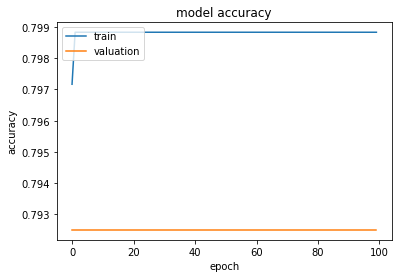

In [52]:
plt.plot(NN_classifier3.history['accuracy'])
plt.plot(NN_classifier3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valuation'], loc='upper left')
plt.show()

In [53]:
y_pred3 = classifier3.predict(X_val)
y_pred3 = (y_pred3 > 0.5)

In [54]:
accuracy_val = accuracy_score(y_val, y_pred3)
print(accuracy_val)

0.7925


In [55]:
accuracy_test = accuracy_score(y_test, y_pred3)
print(accuracy_test)

0.7925


### CONFUSION MATRIX FOR THE MODEL:

Text(0.5, 15.0, 'Predicted Customer Churn')

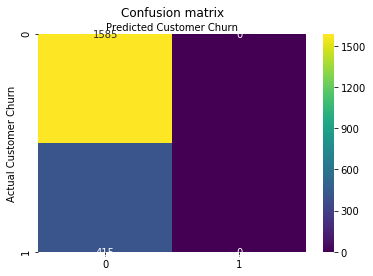

In [56]:
y_preds3 = []
for val in y_pred3:
    y_preds3.append(np.argmax(val))
#print(y_pred)    

#convert 0 1 to 1 and 1 0 as 0
cm3 = metrics.confusion_matrix(y_test,y_pred3)

fig, ax = plt.subplots()
tick_marks = np.arange(len("Predict")) 
plt.xticks(tick_marks, "Predict 1")
plt.yticks(tick_marks, "Predict 0")
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Customer Churn')
plt.xlabel('Predicted Customer Churn')

In [57]:
cr=metrics.classification_report(y_test,y_pred3)
print(cr)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1585
           1       0.00      0.00      0.00       415

    accuracy                           0.79      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.79      0.70      2000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### END OF NEURAL NETWORK PROJECT - BANK CHURN PREDICTION!